In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [42]:
pd.pivot_table(results_dataframe, index=["Victim Sex", "Premise Description"],values=['Victim Age'],  aggfunc={
        'Victim Age': ['mean', 'max', 'min', 'count']})

Victim Age                       
                                               count   max       mean   min
Victim Sex Premise Description                                             
F          AIRCRAFT                                1  22.0  22.000000  22.0
           ALLEY                                 307  99.0  41.794788  18.0
           AUTOMATED TELLER MACHINE (ATM)          1  42.0  42.000000  42.0
           BANK                                    2  70.0  49.000000  28.0
           BEACH                                   2  26.0  24.500000  23.0
...                                              ...   ...        ...   ...
M          VACANT LOT                             43  76.0  39.325581  19.0
           VALET                                   1  29.0  29.000000  29.0
           VEHICLE, PASSENGER/TRUCK               13  61.0  37.615385  23.0
           WAREHOUSE                               3  50.0  41.666667  25.0
           YARD (RESIDENTIAL/BUSINESS)            15  99.0  52.533333  28.0

[183 rows x 4 columns]

In [75]:
# how many male and female Victims
results_dataframe['Victim Sex'].value_counts()

Victim Sex
M    374441
F    223026
Name: count, dtype: int64

<Axes: xlabel='Victim Sex'>

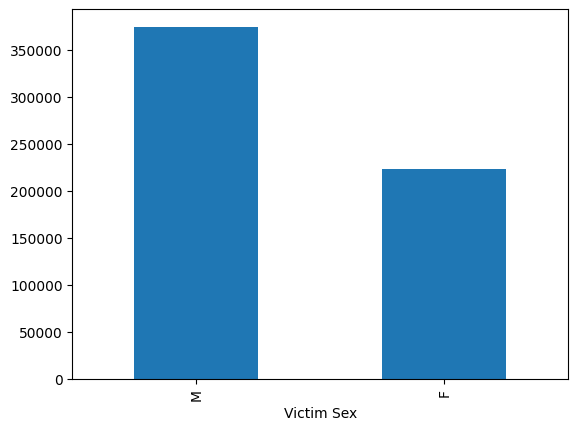

In [72]:
results_dataframe['Victim Sex'].value_counts().plot.bar()

<Figure size 1200x800 with 0 Axes>

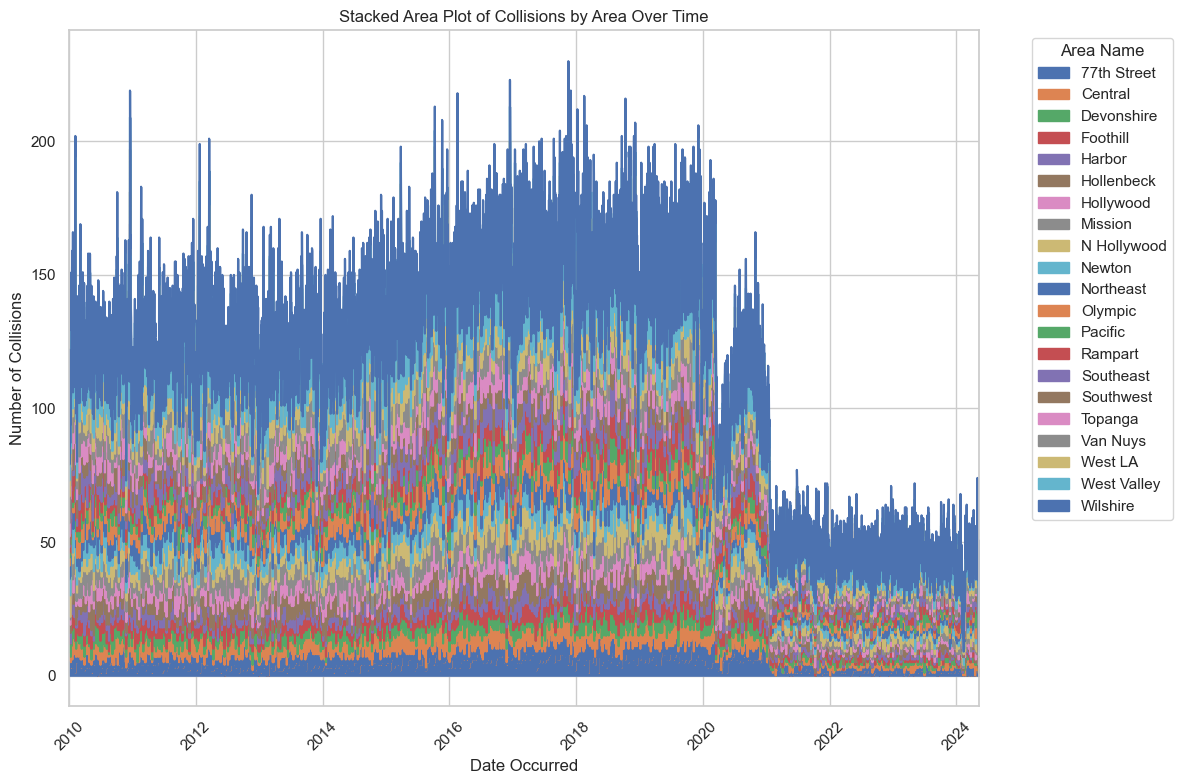

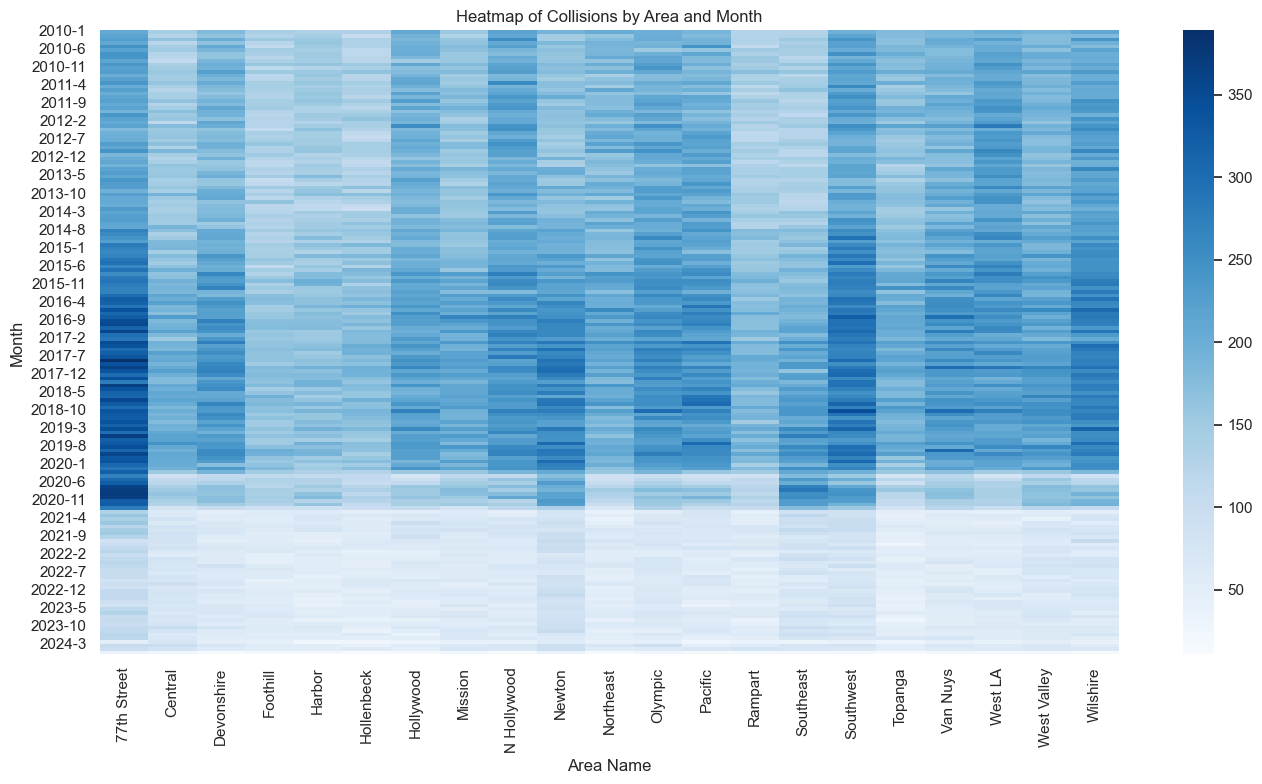

<Figure size 1400x1000 with 0 Axes>

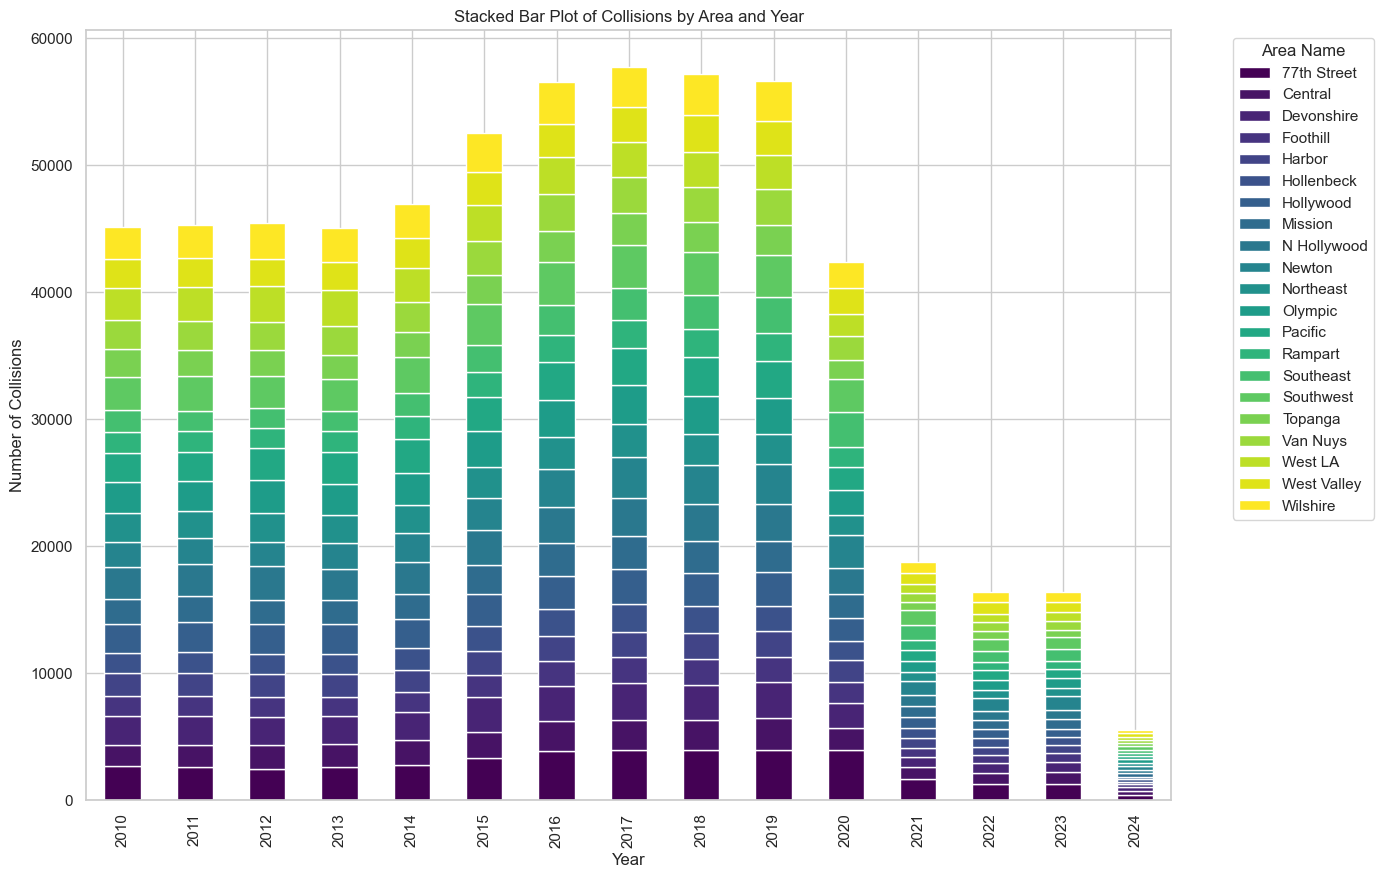

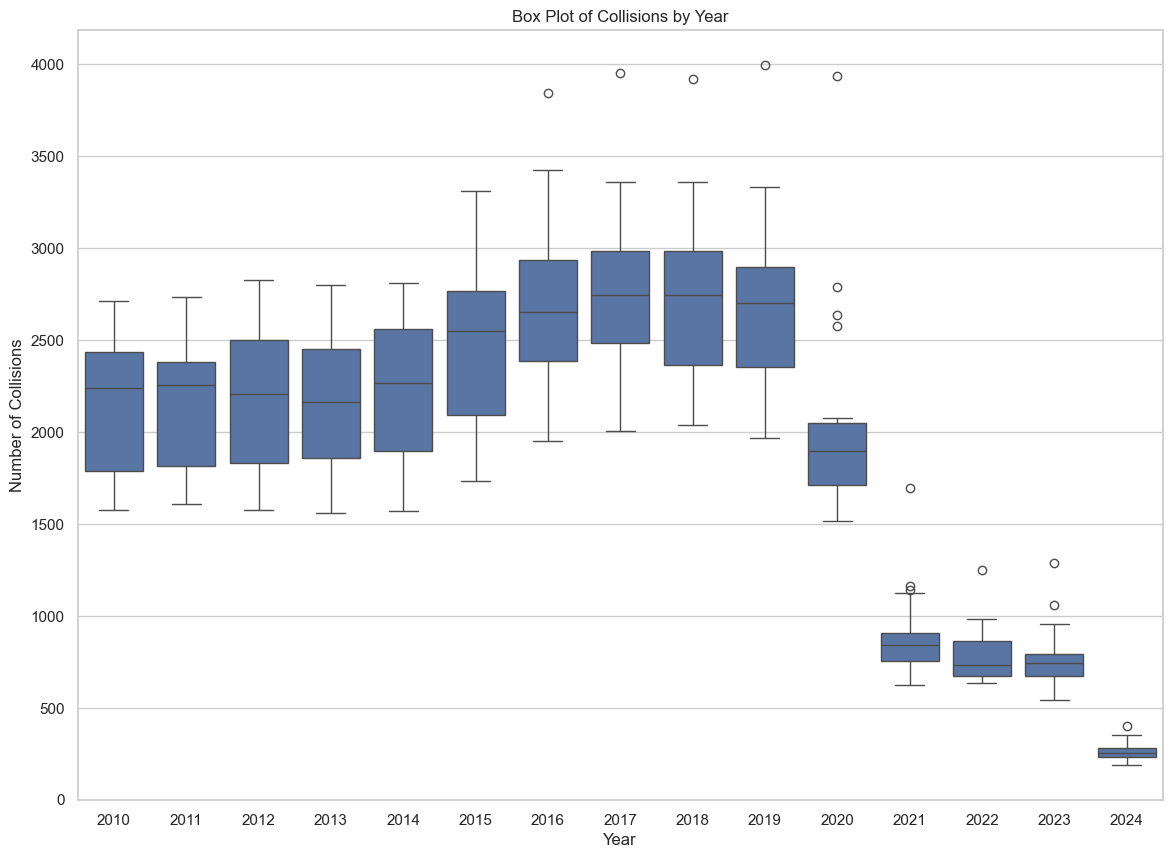

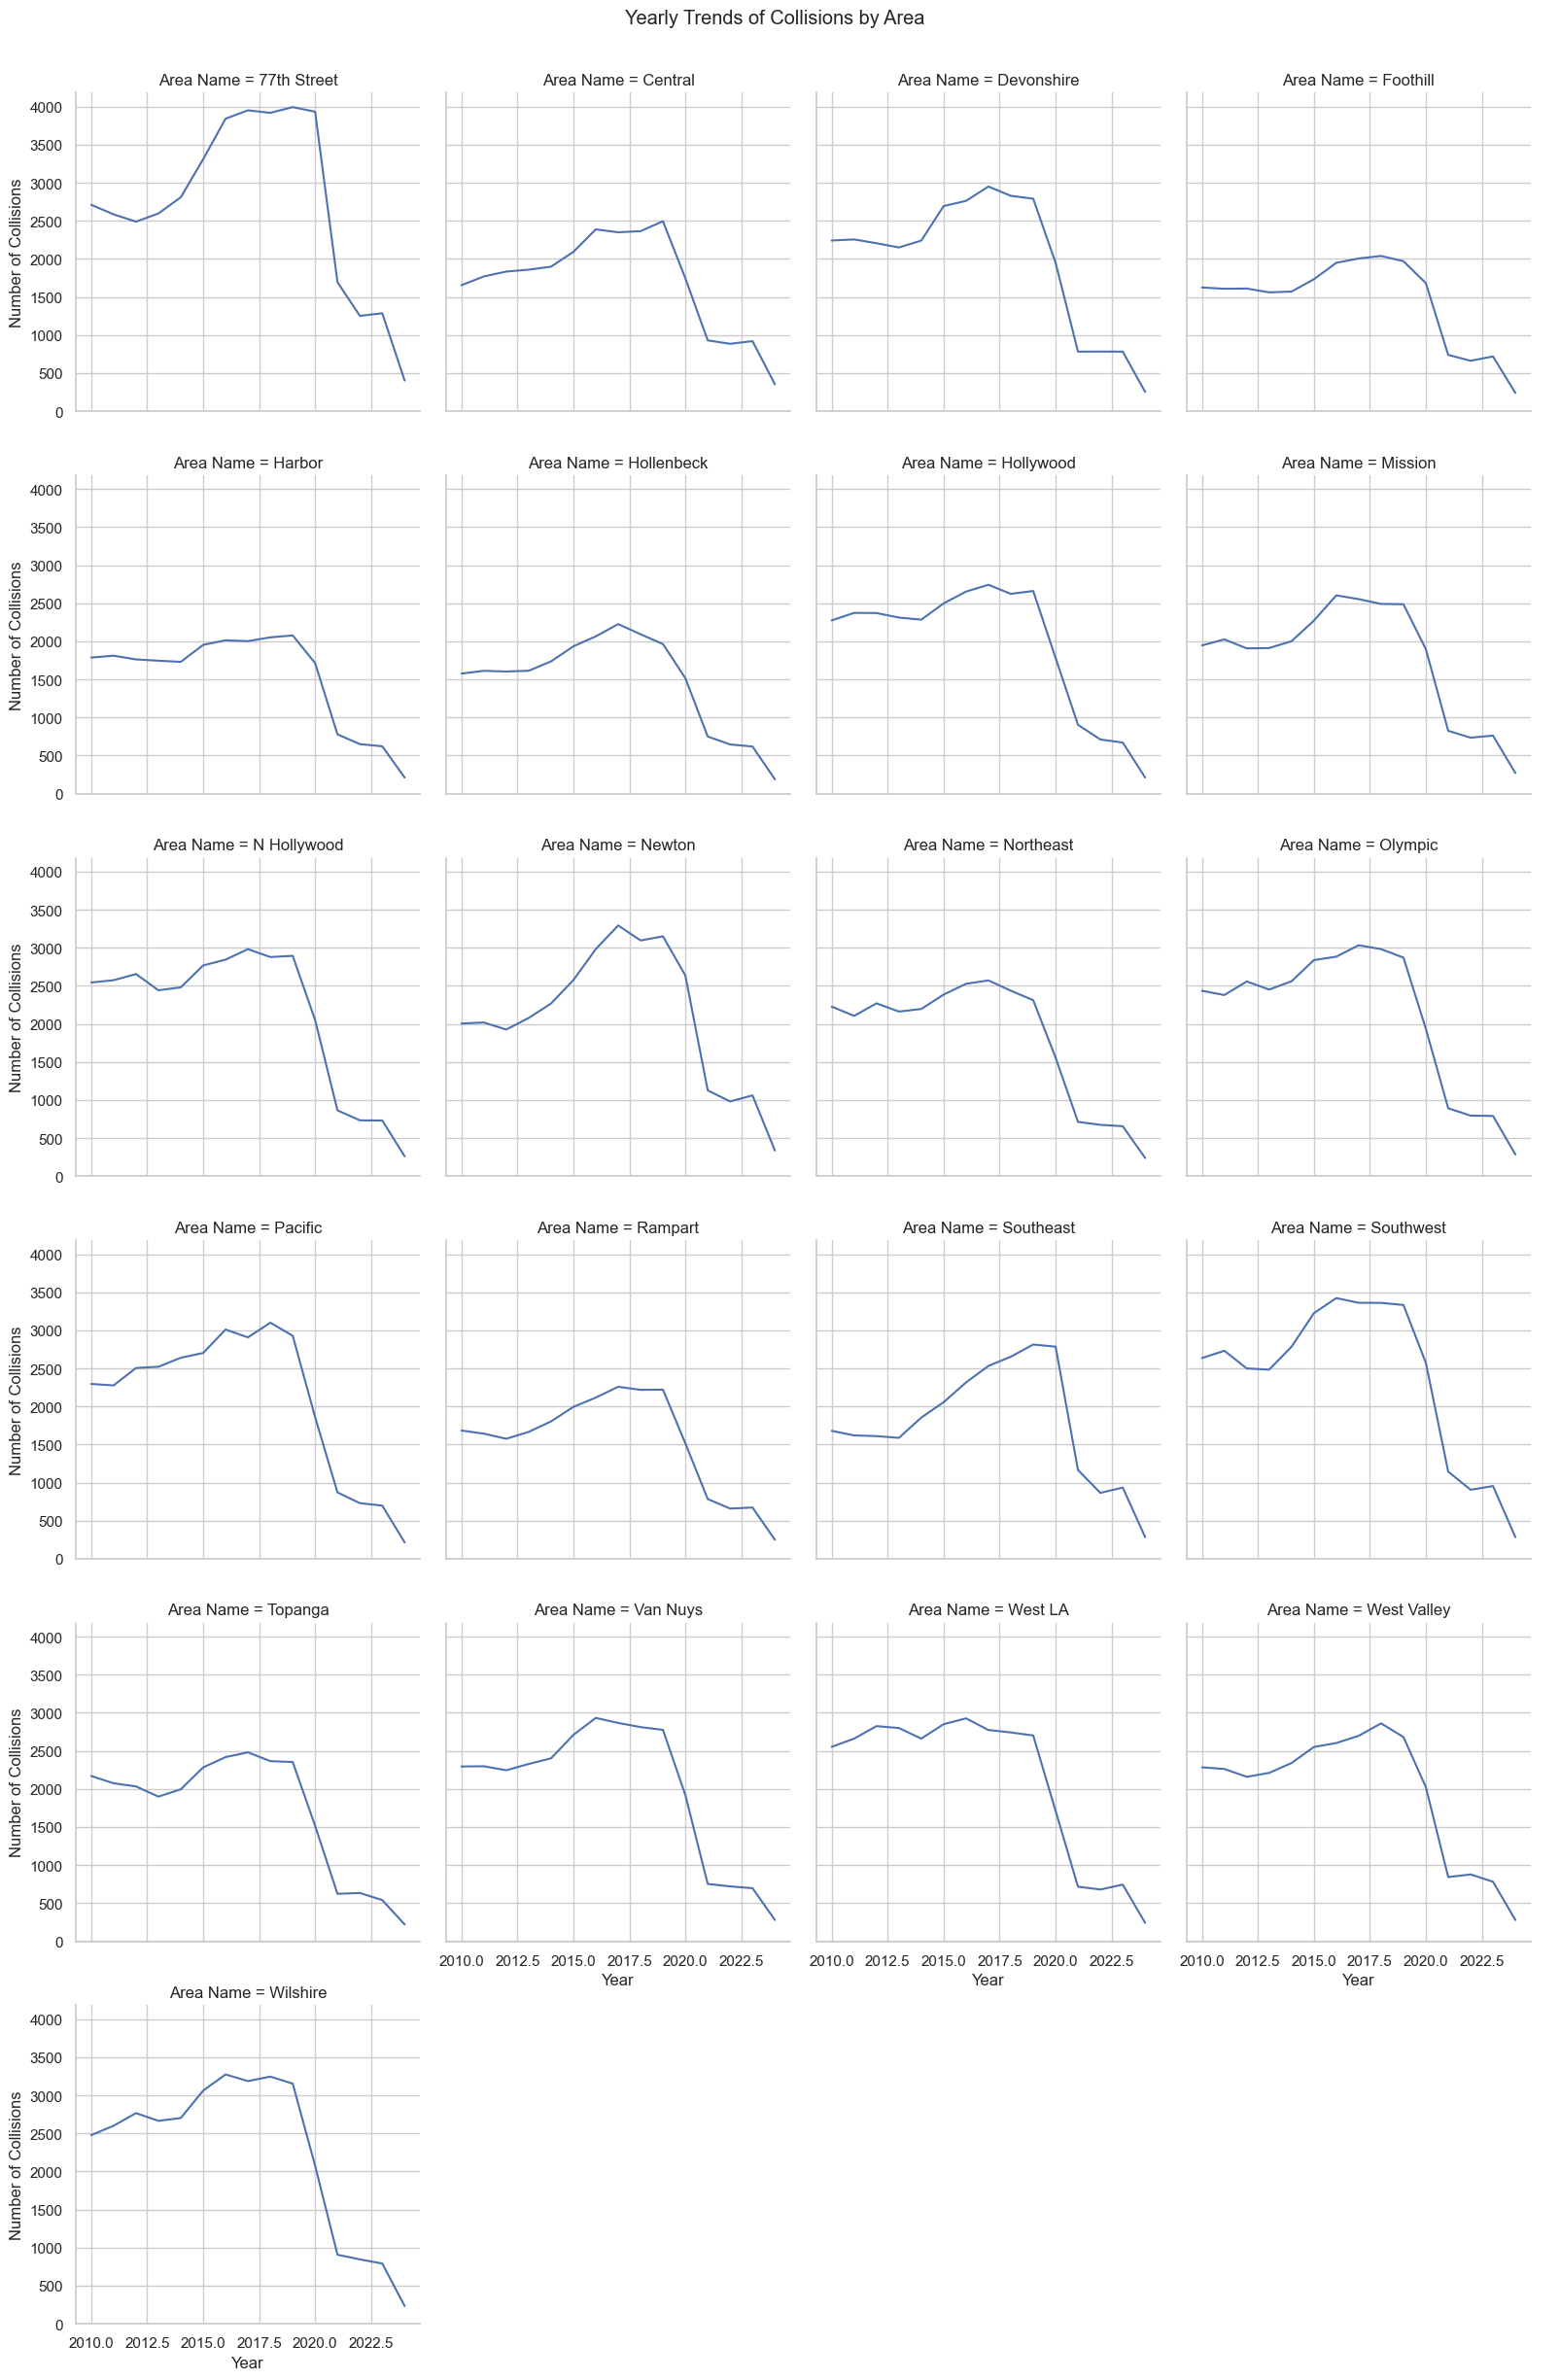

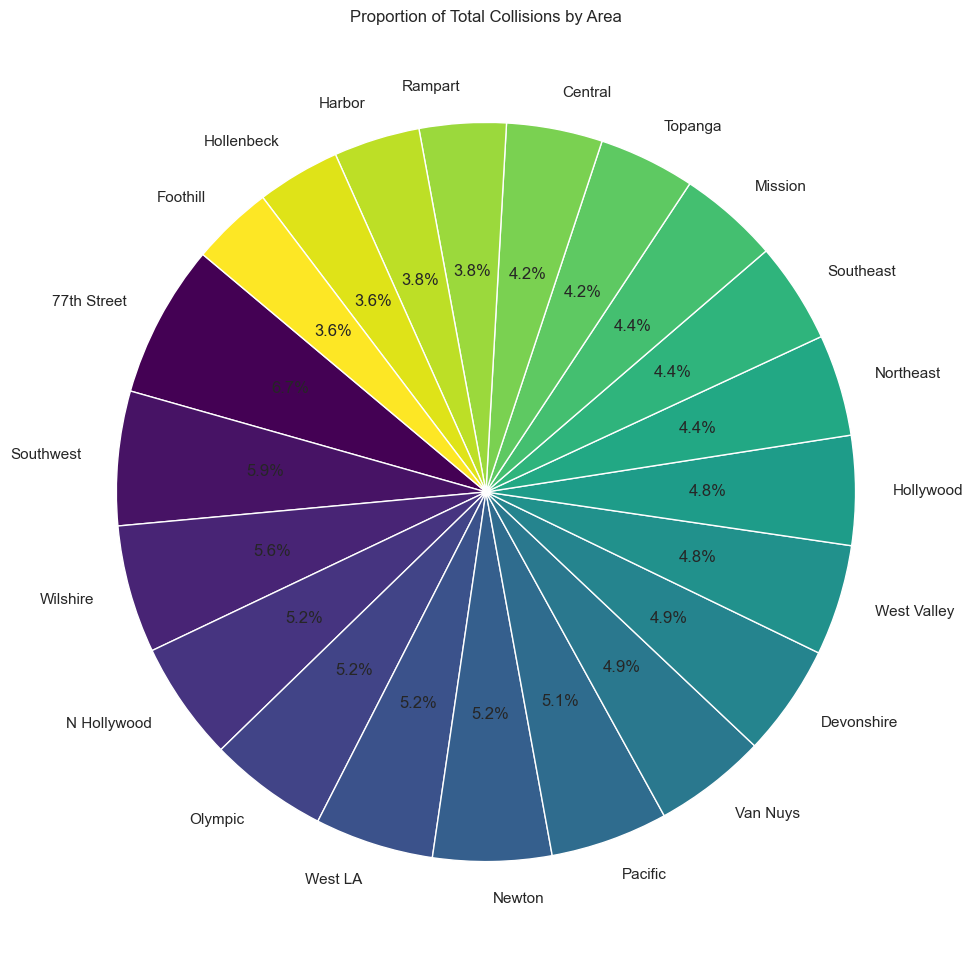

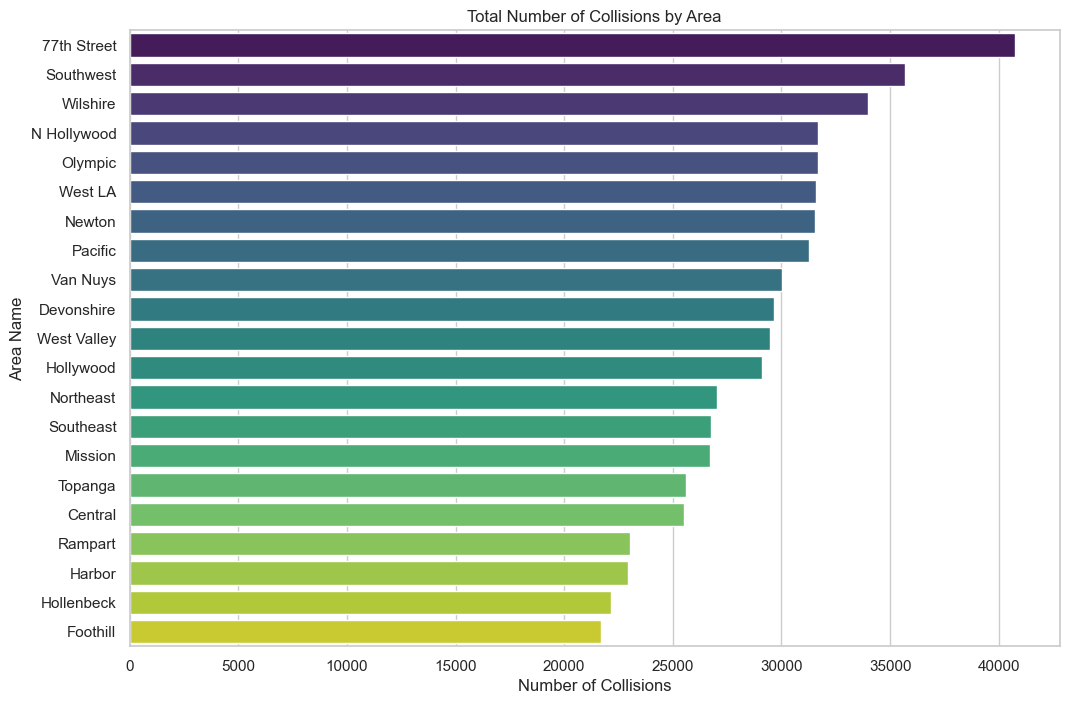

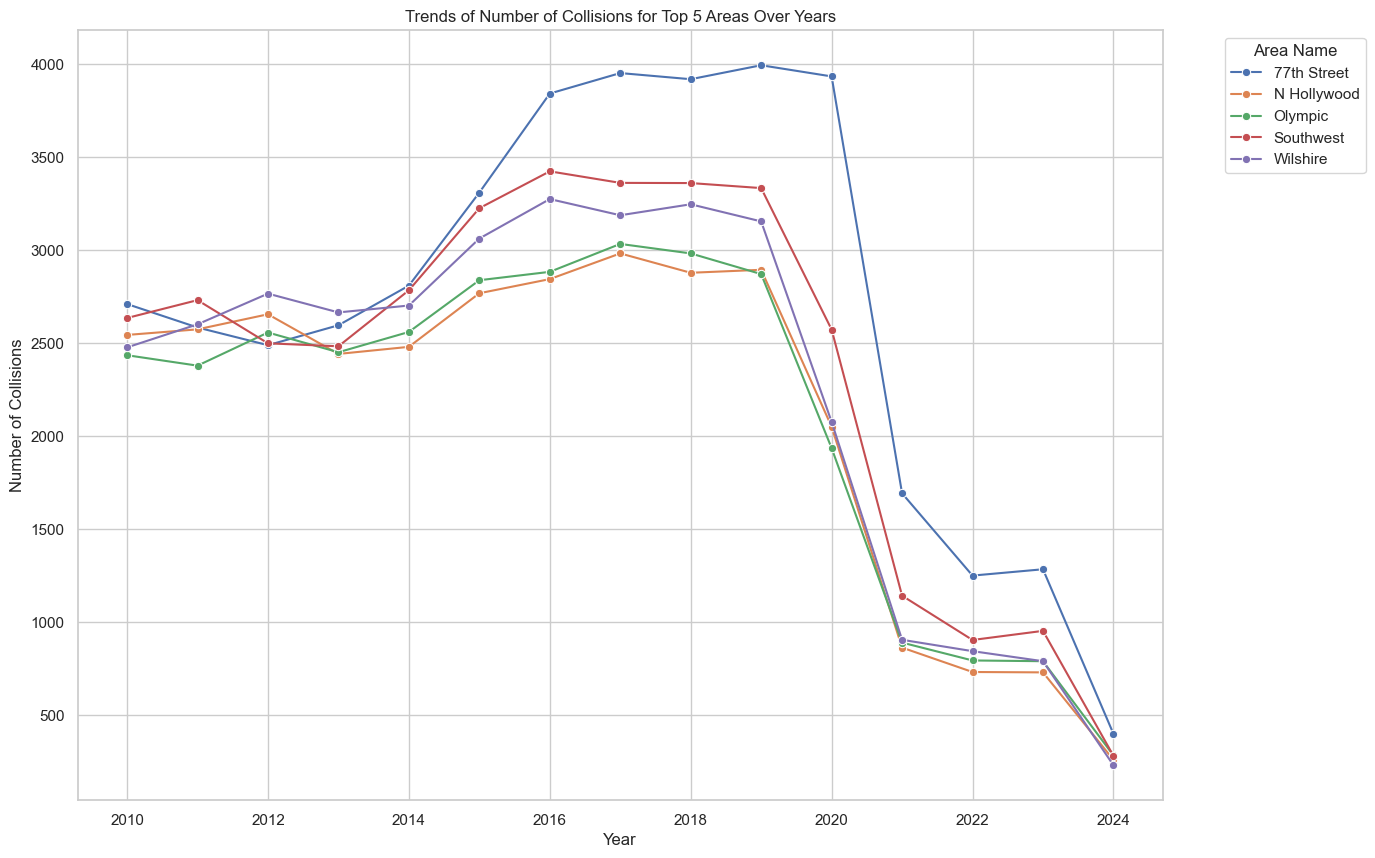

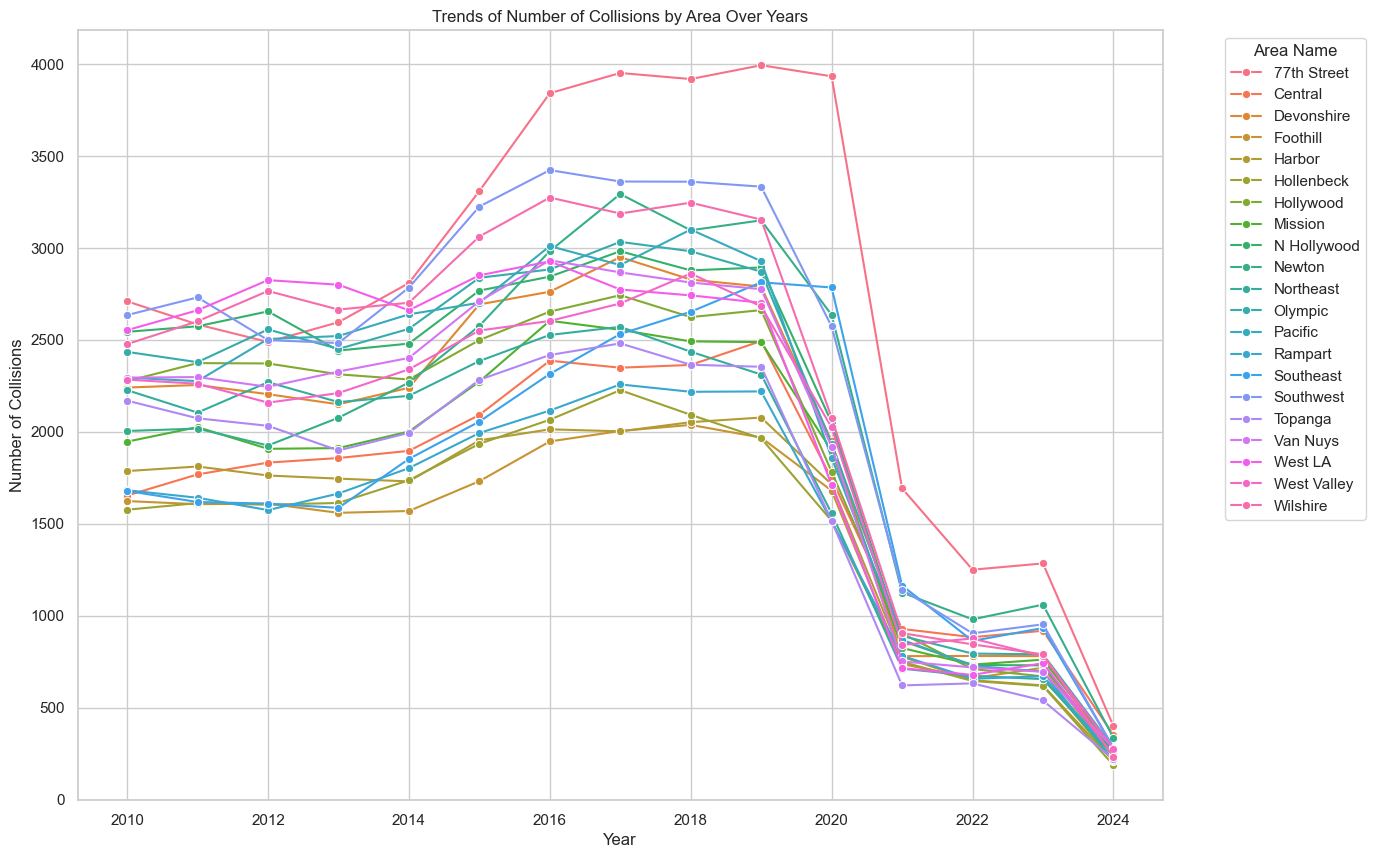

alt.Chart(...)

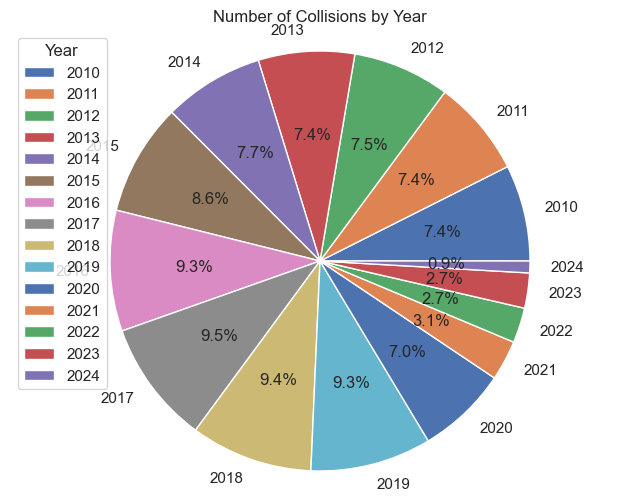

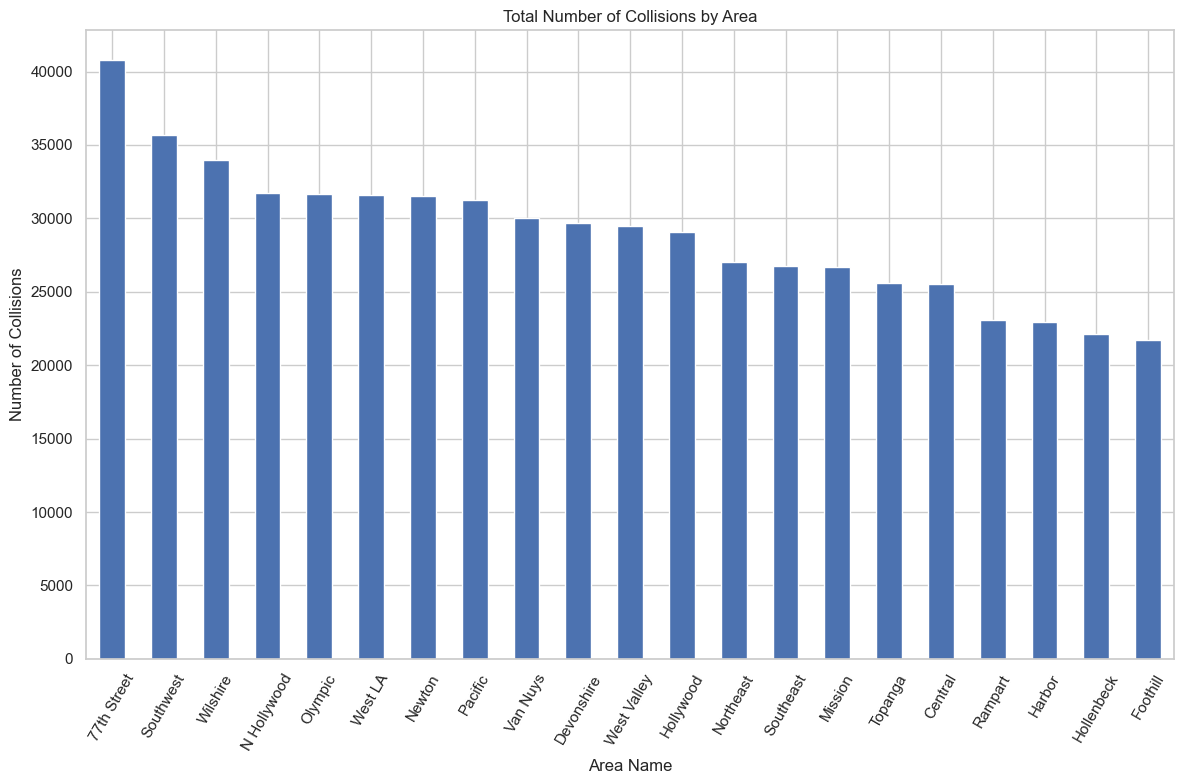

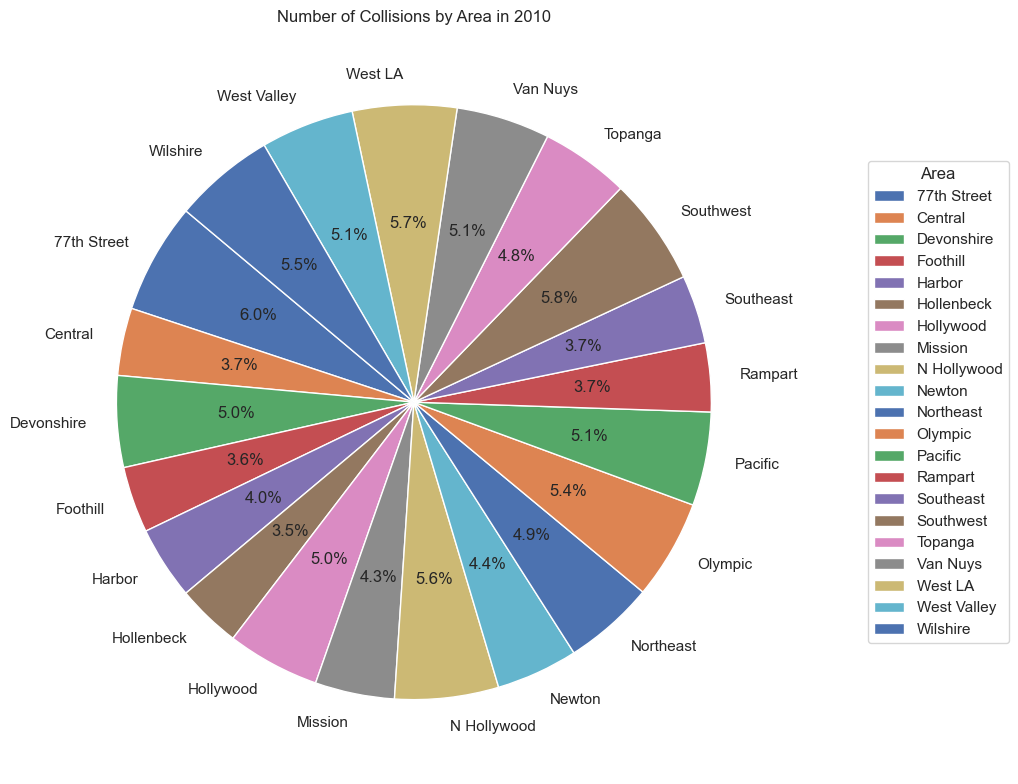

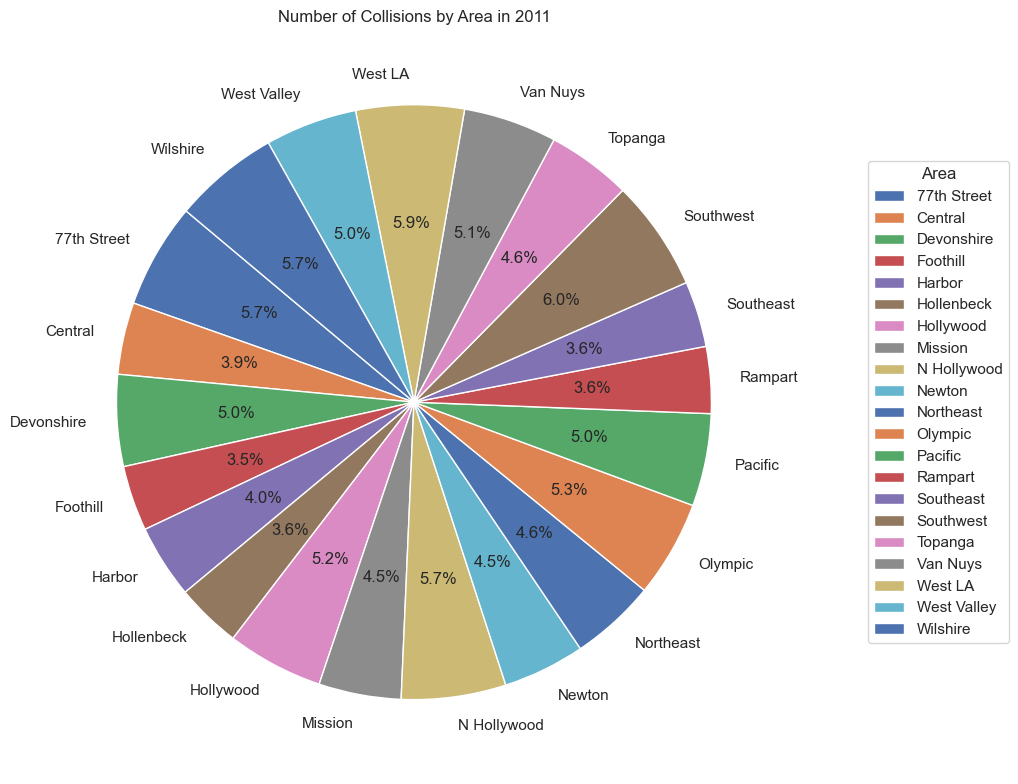

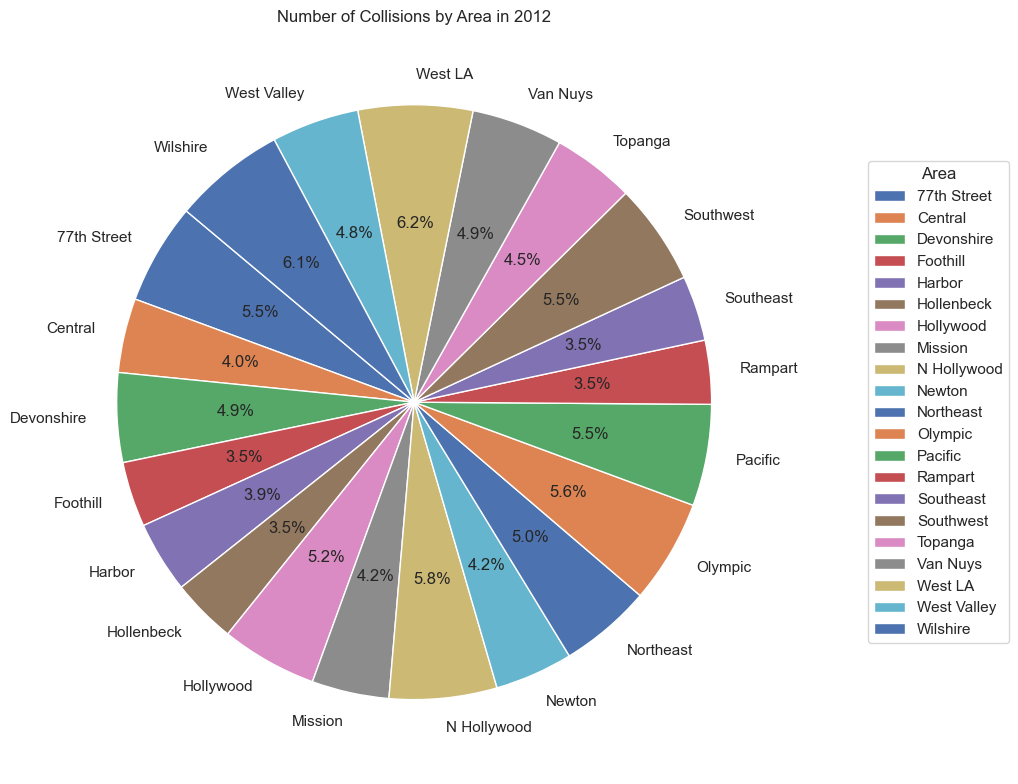

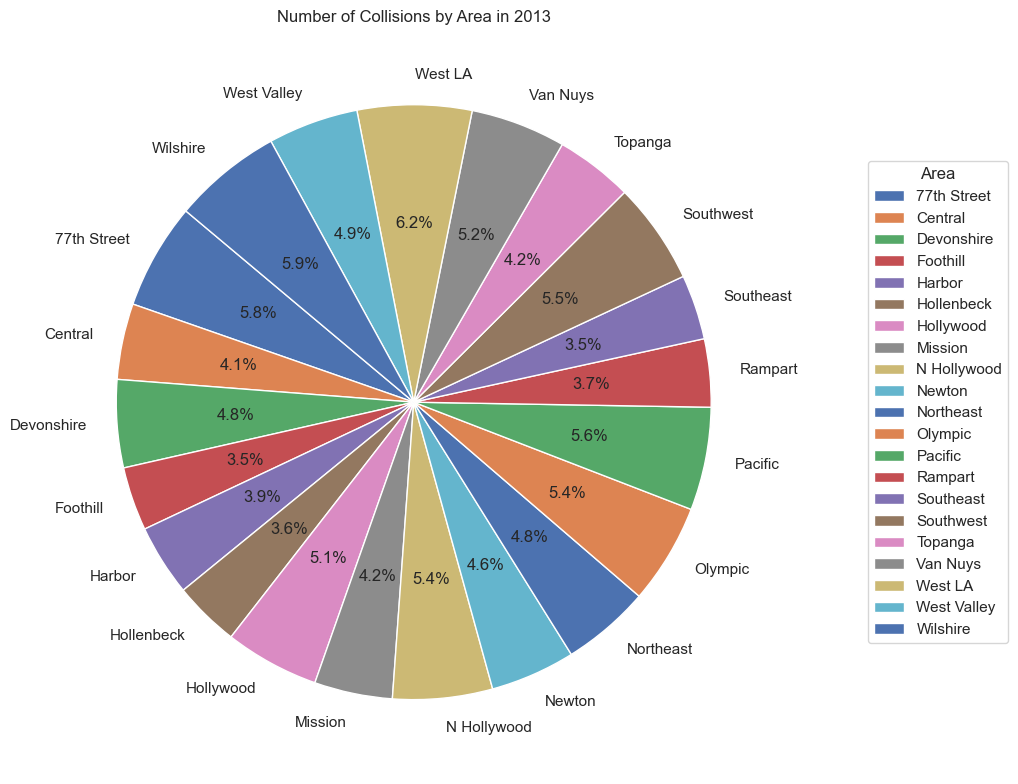

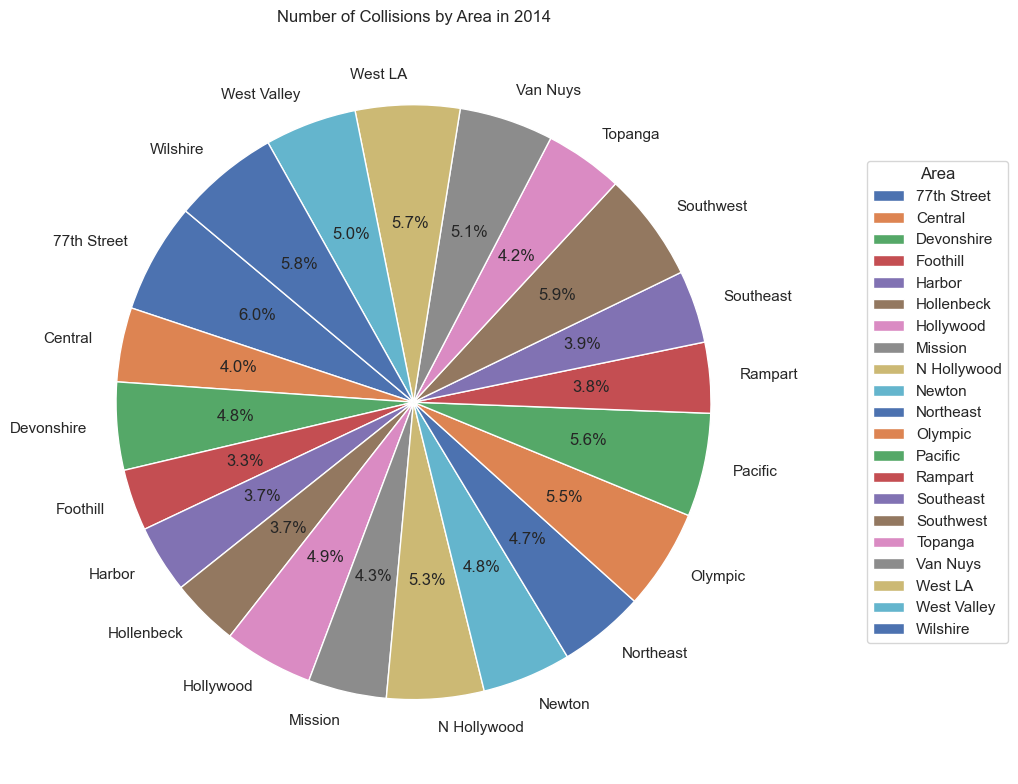

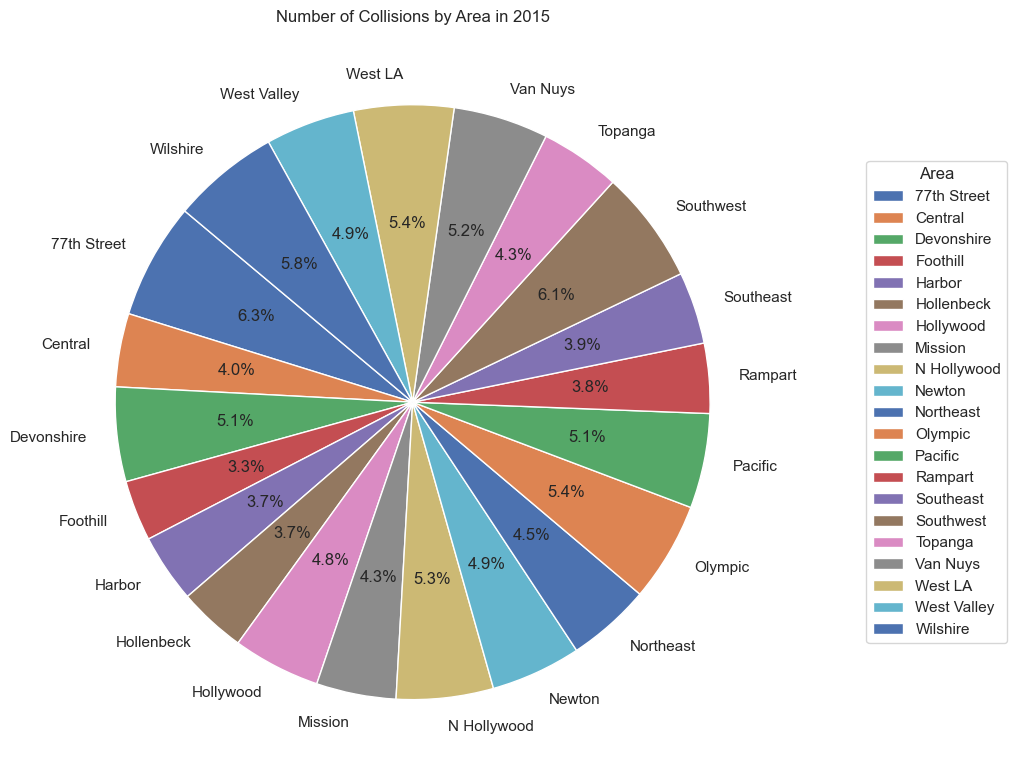

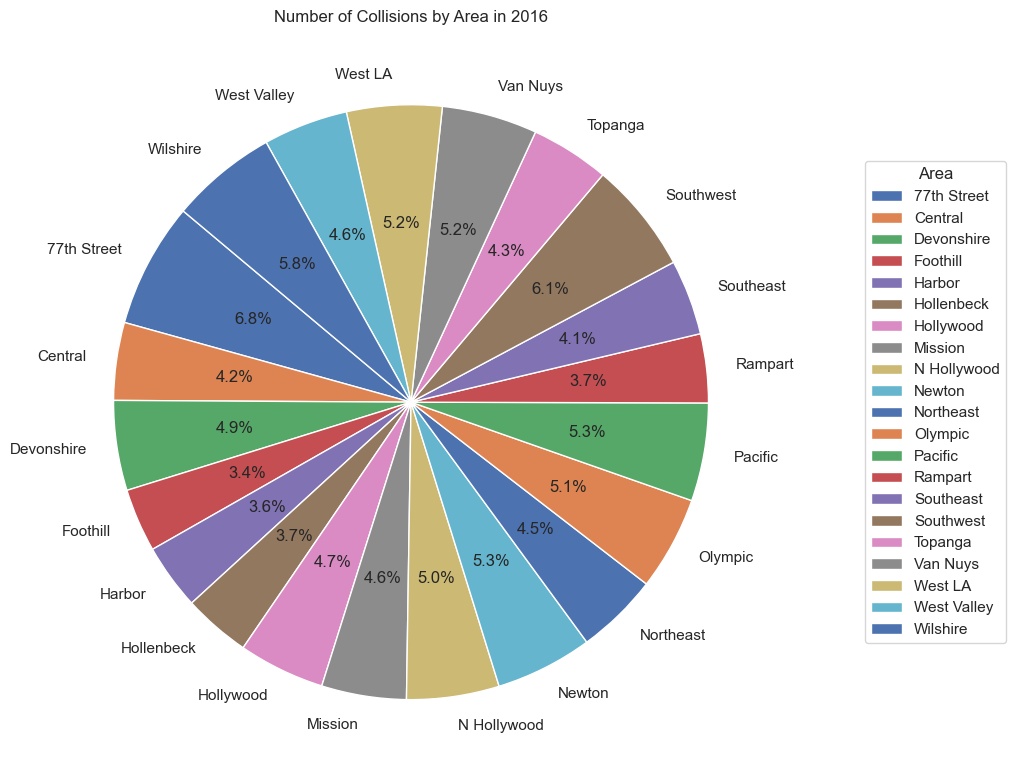

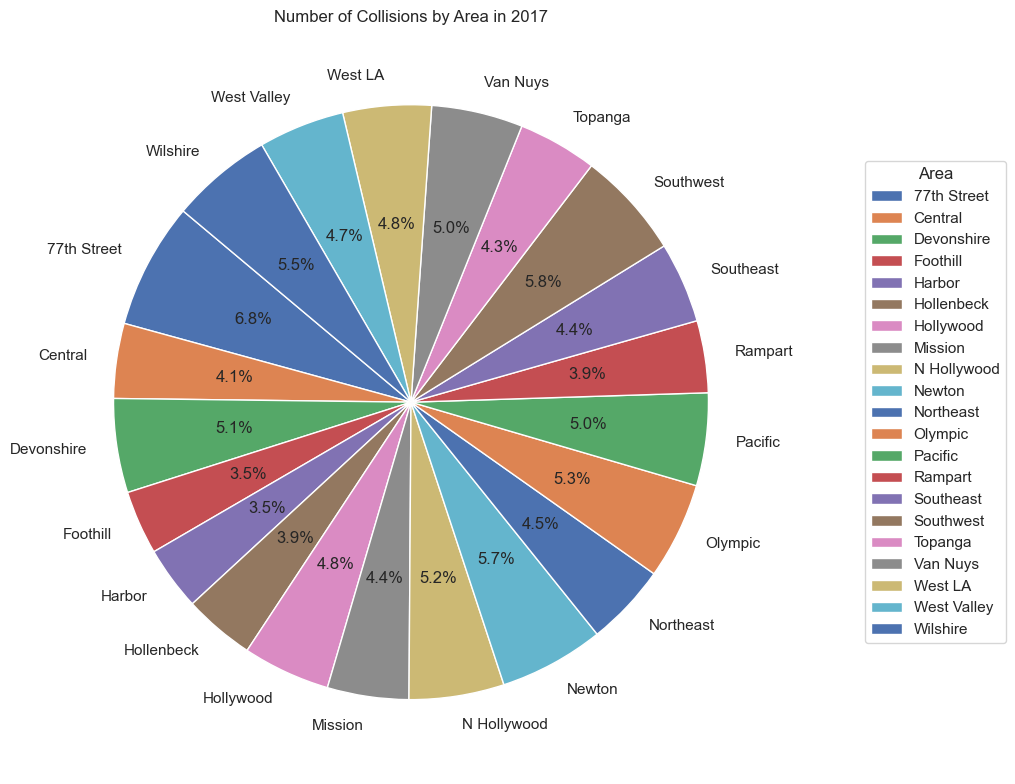

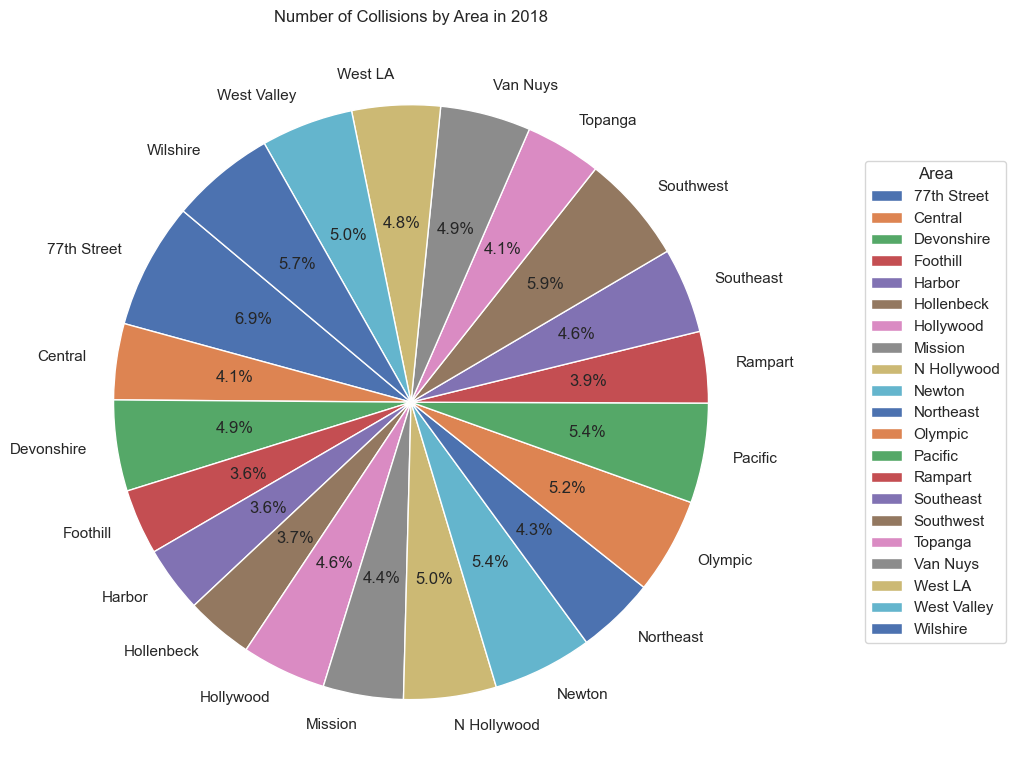

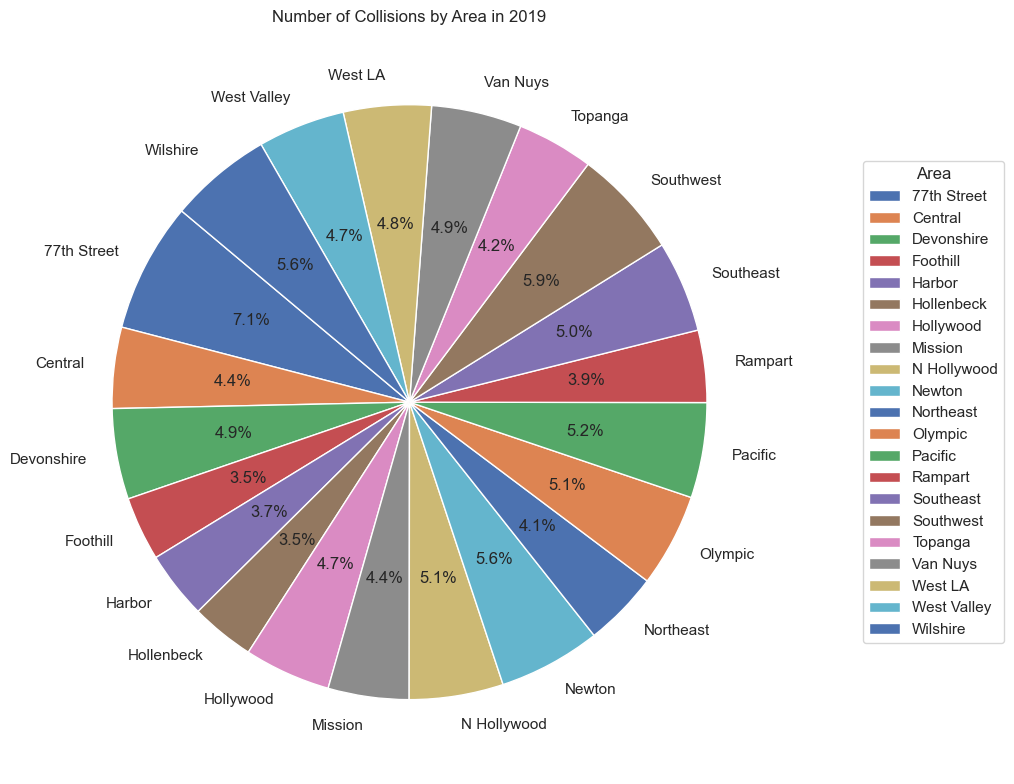

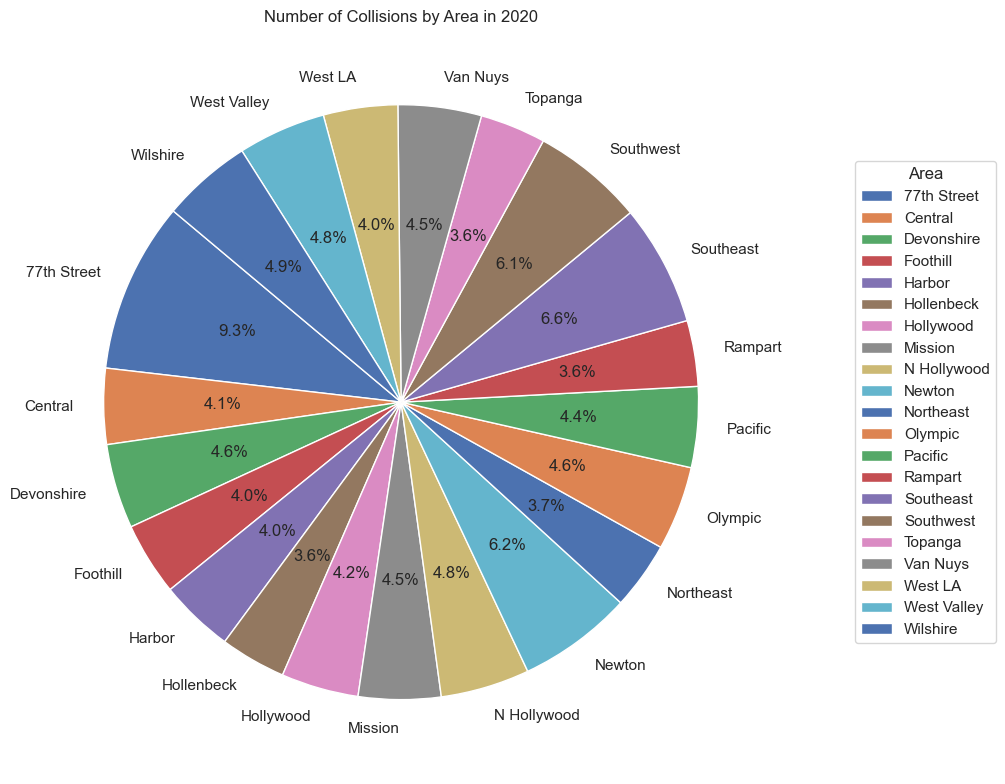

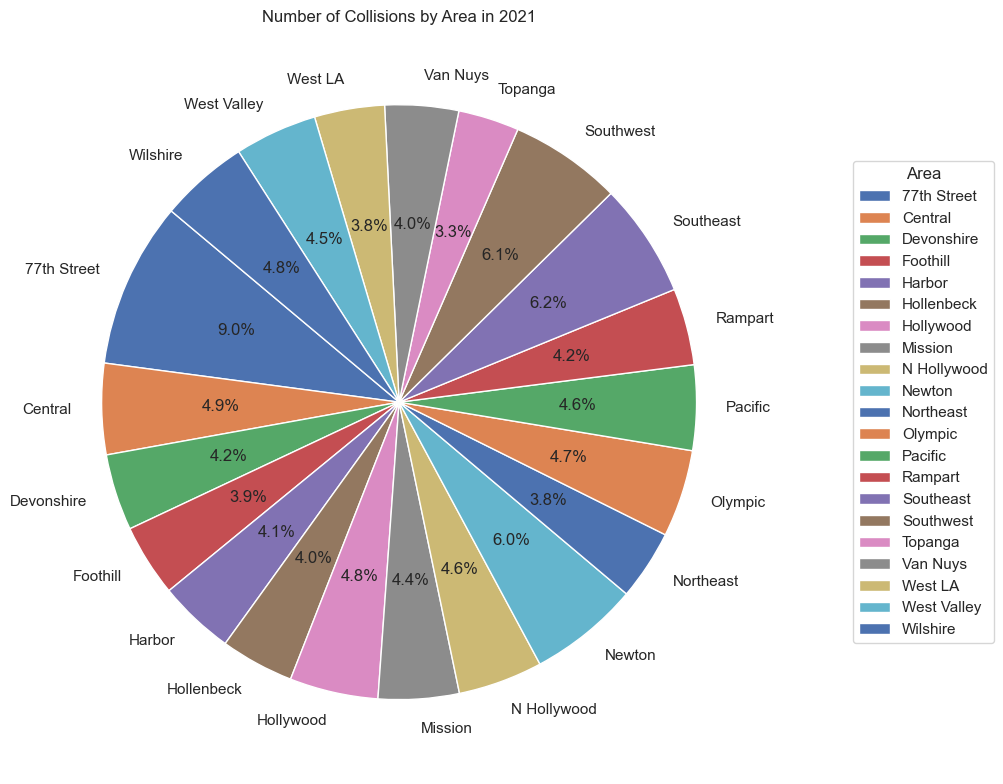

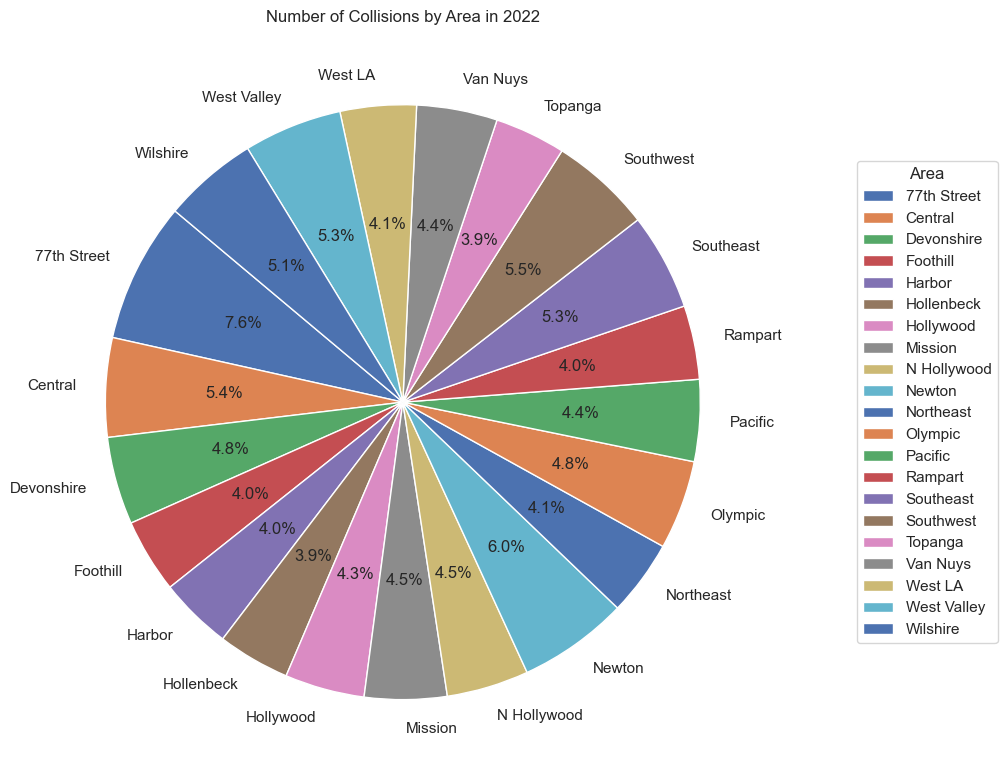

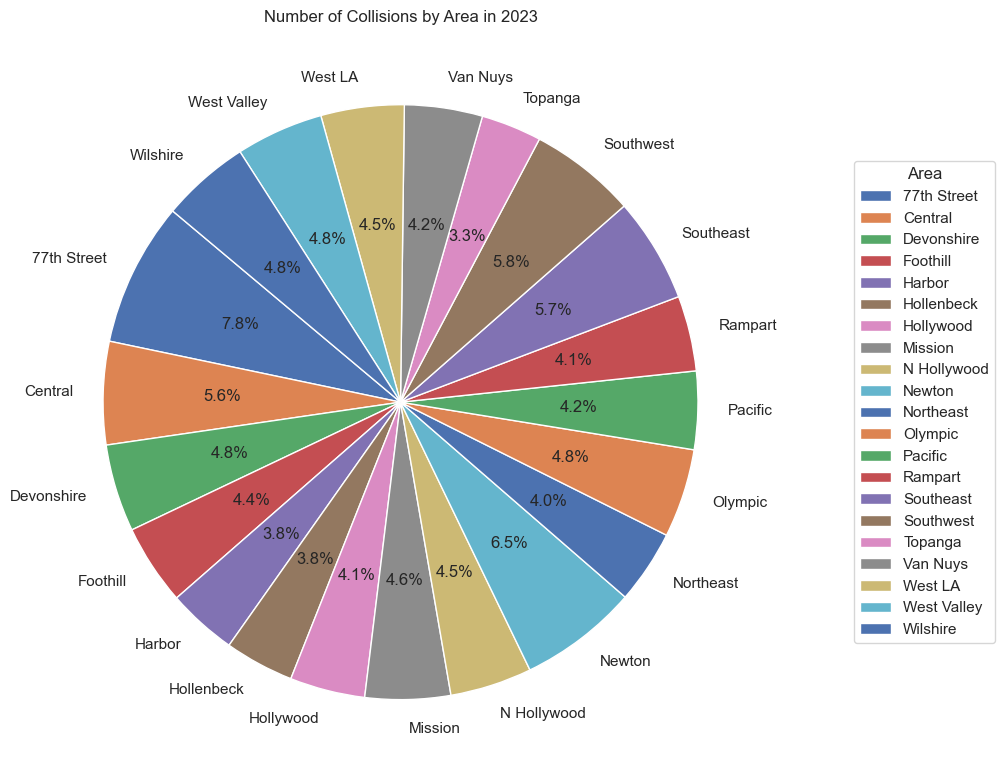

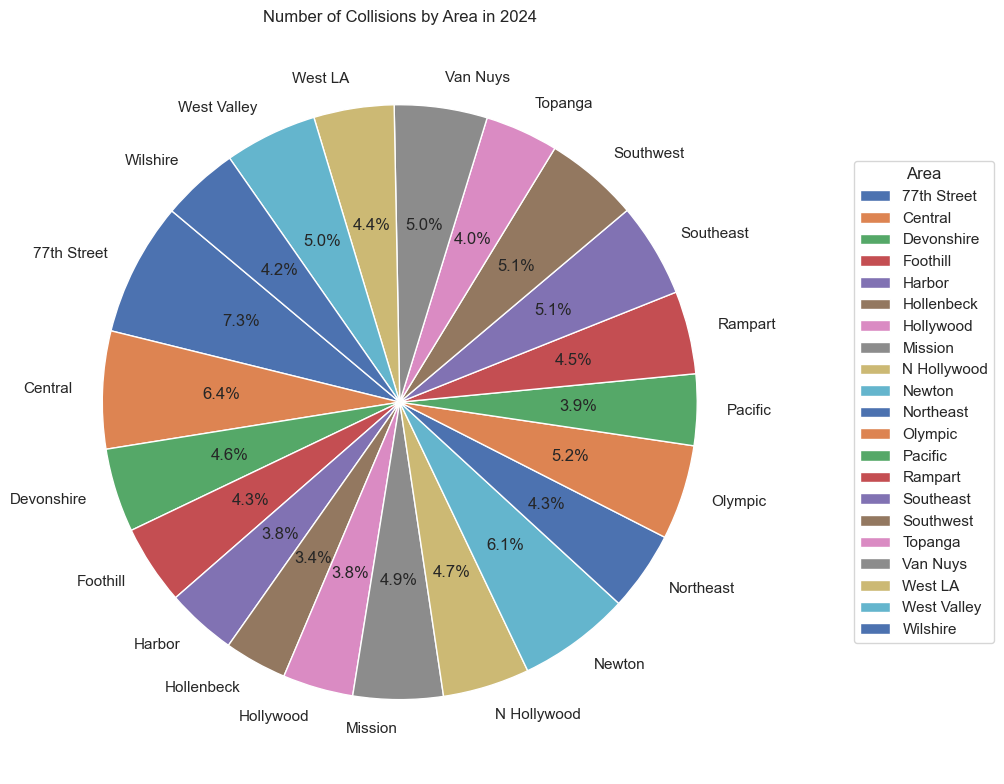

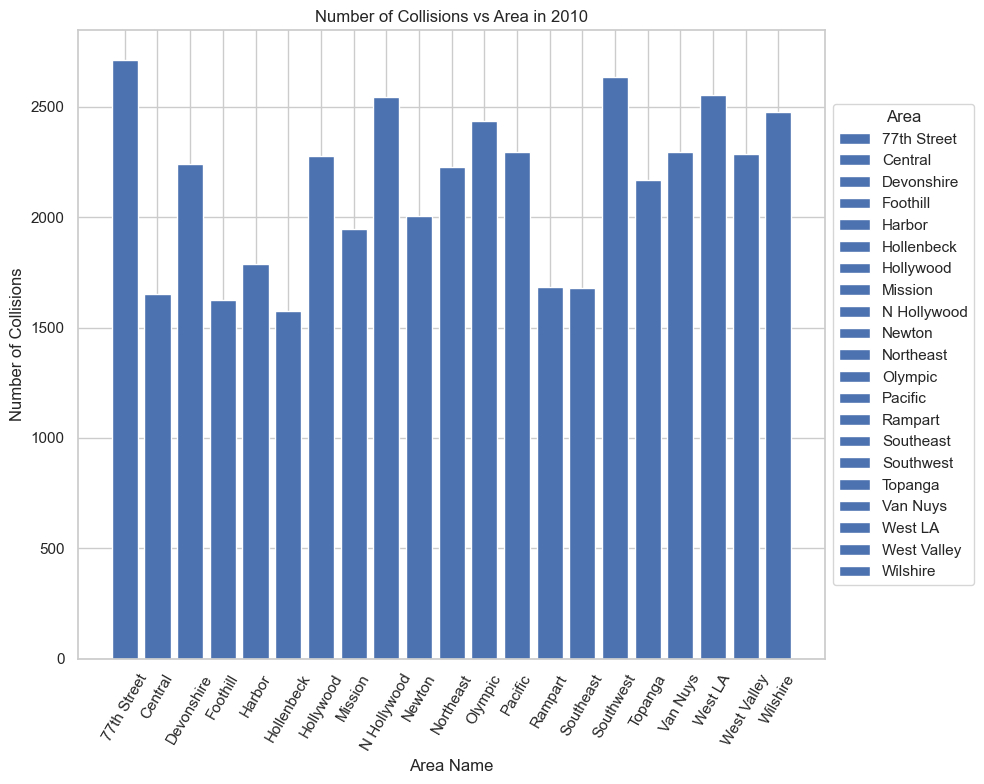

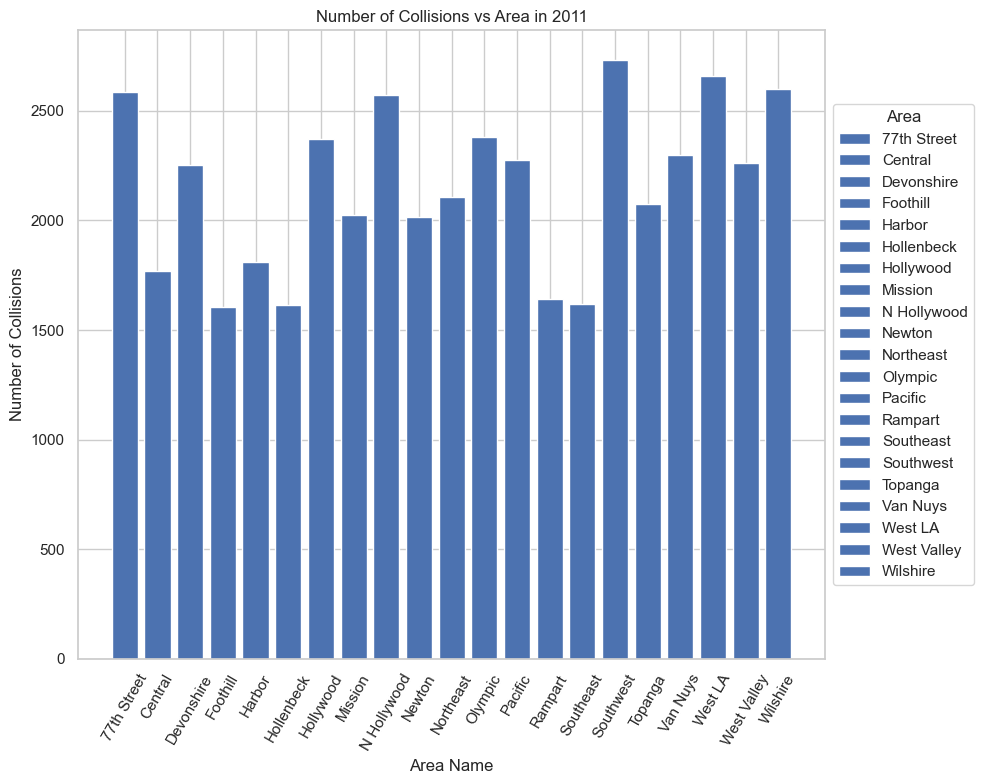

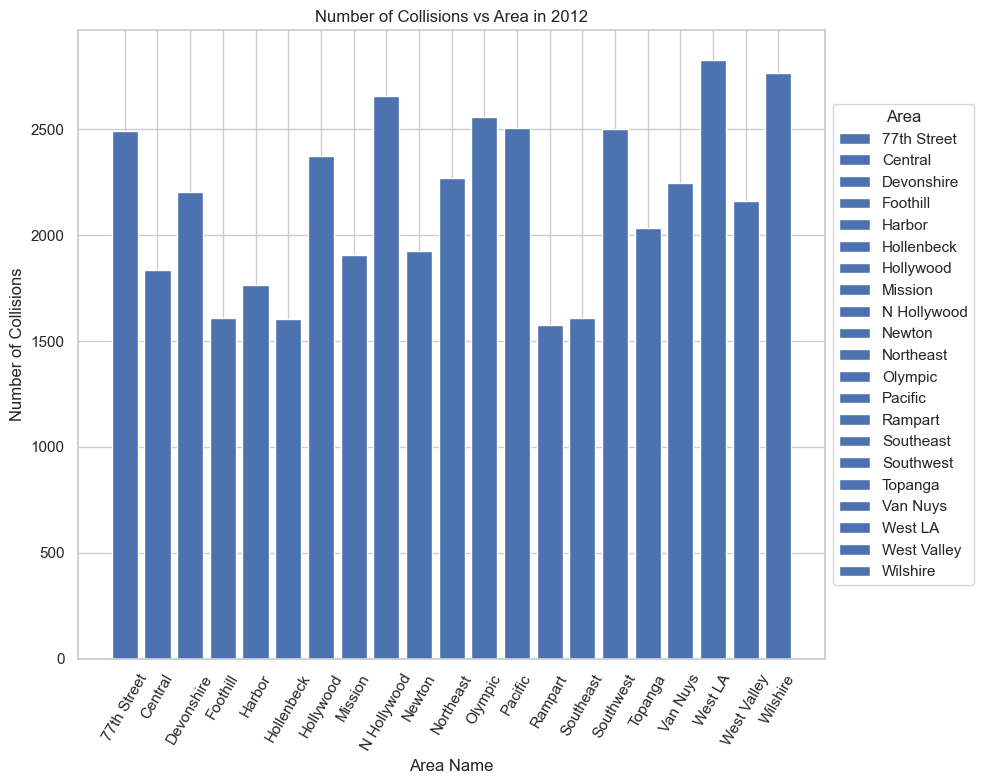

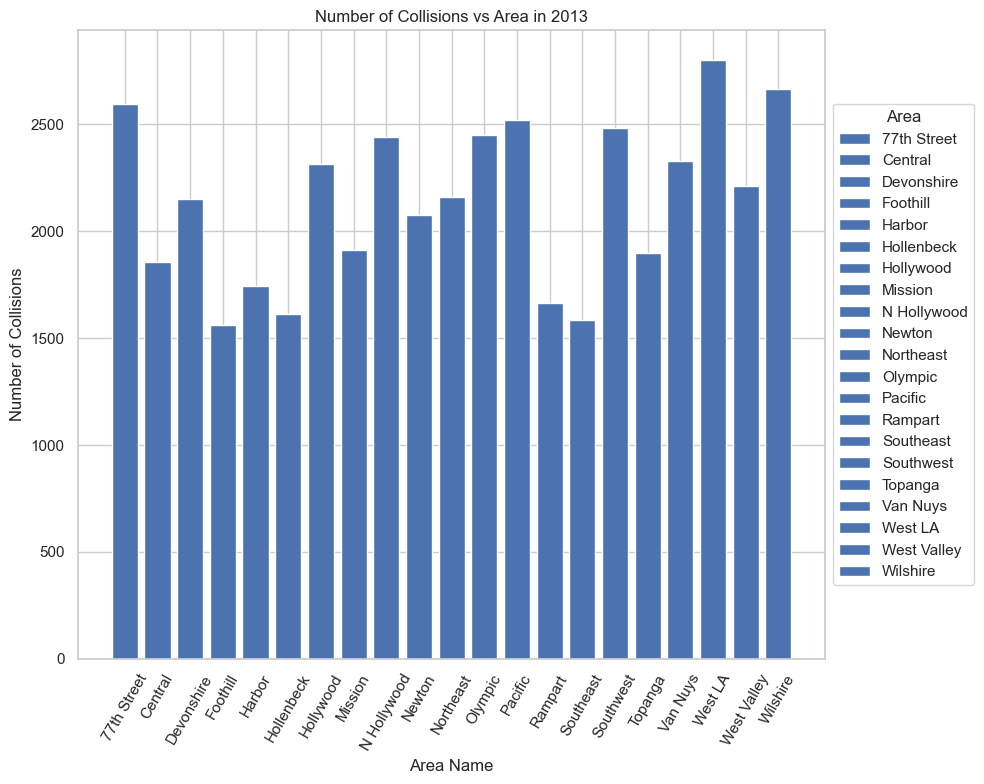

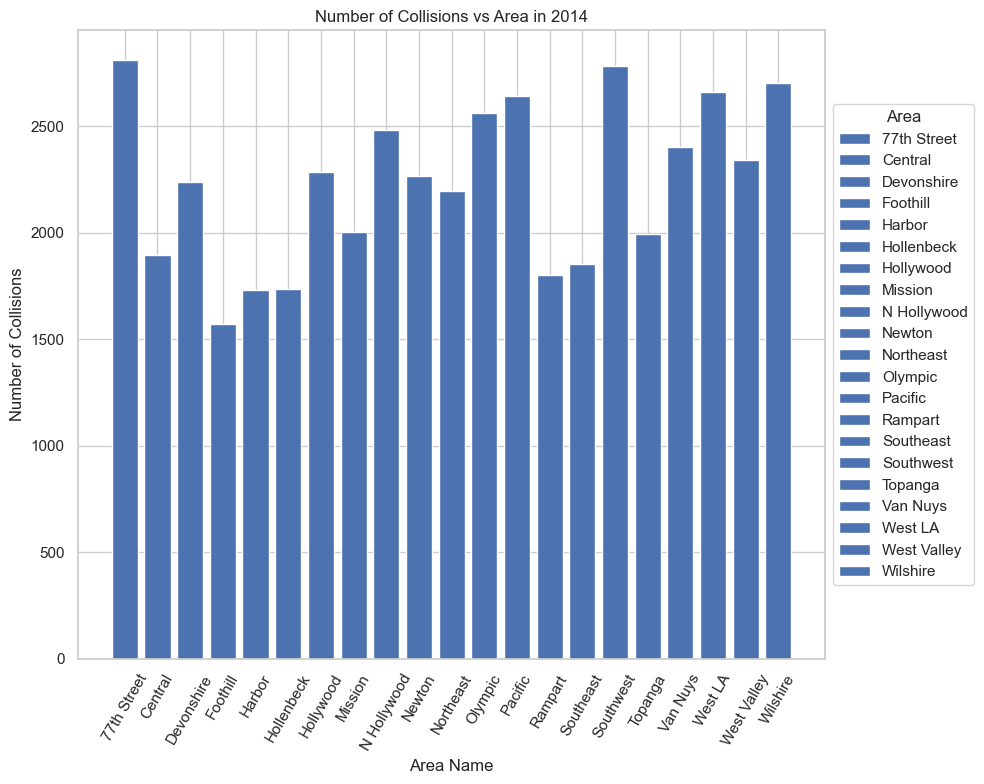

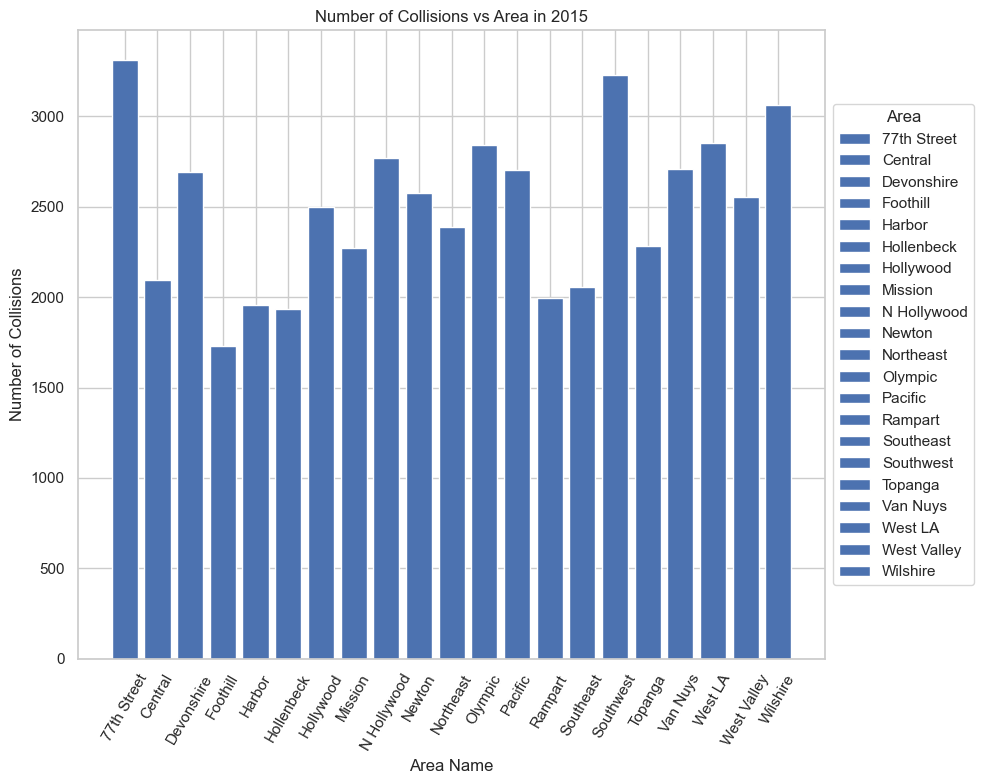

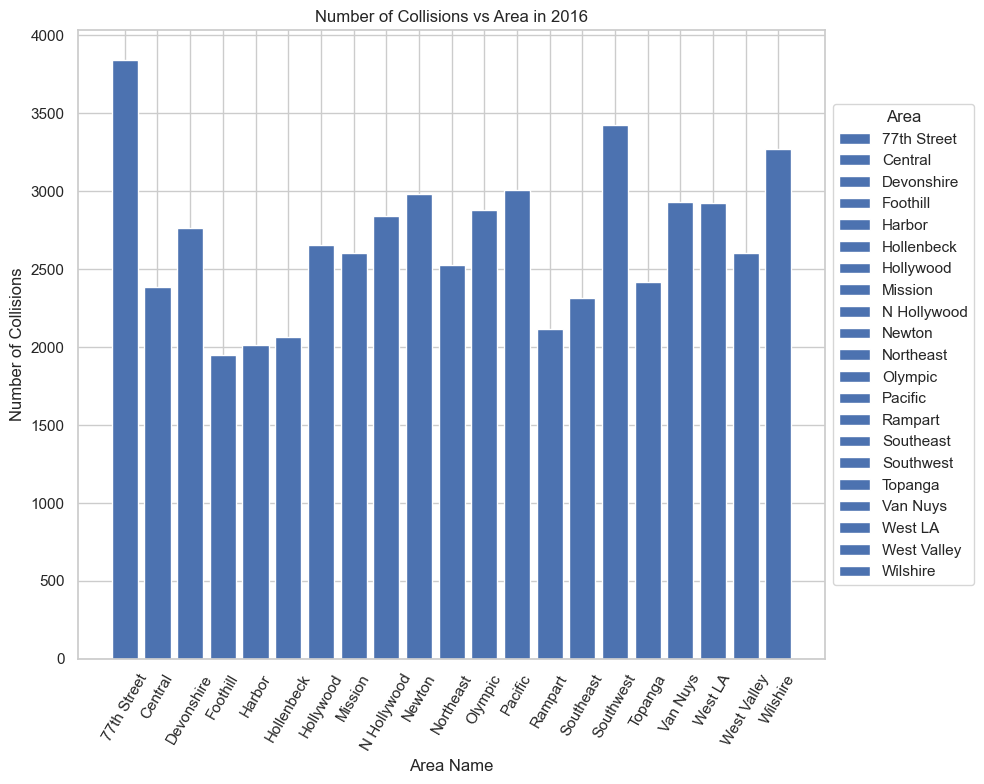

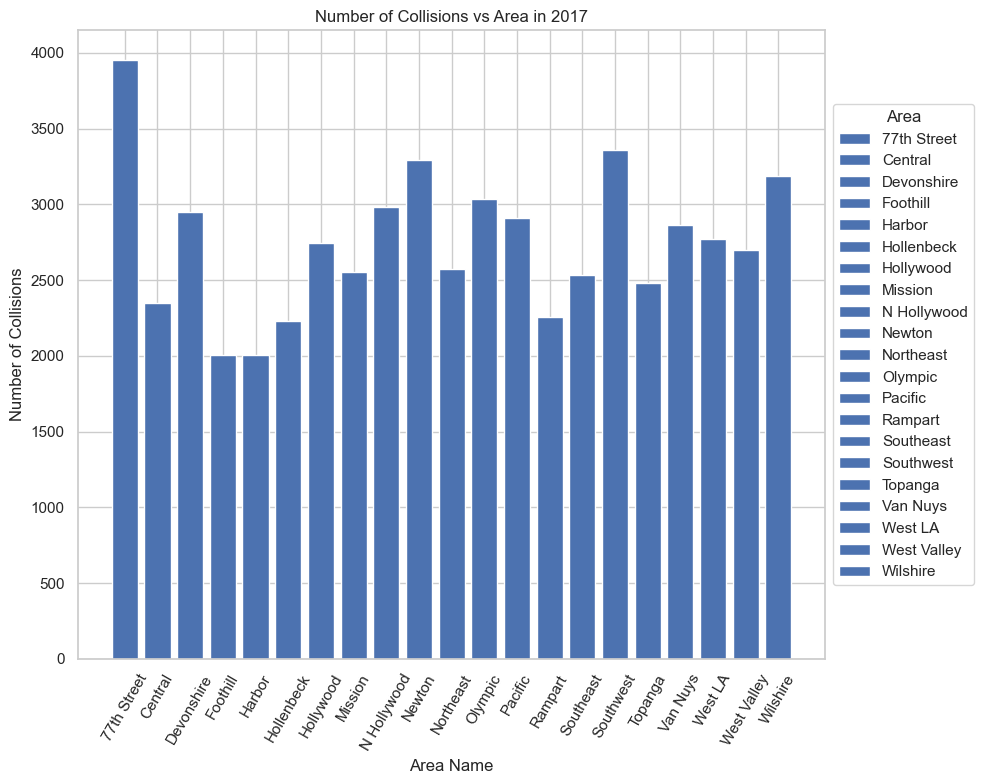

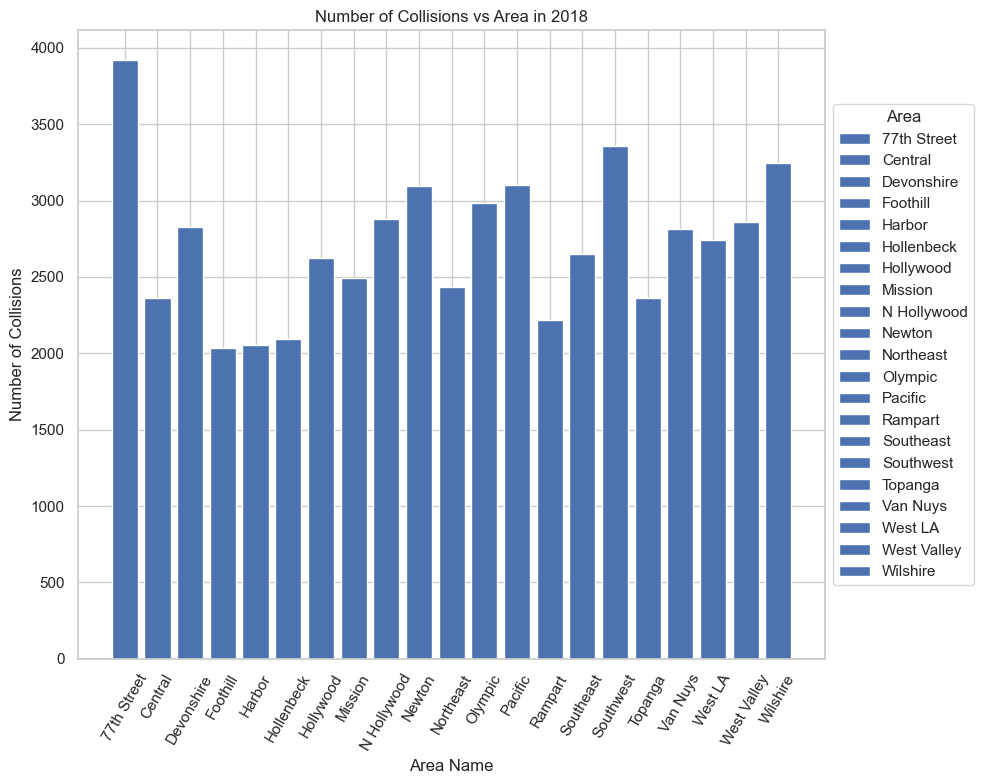

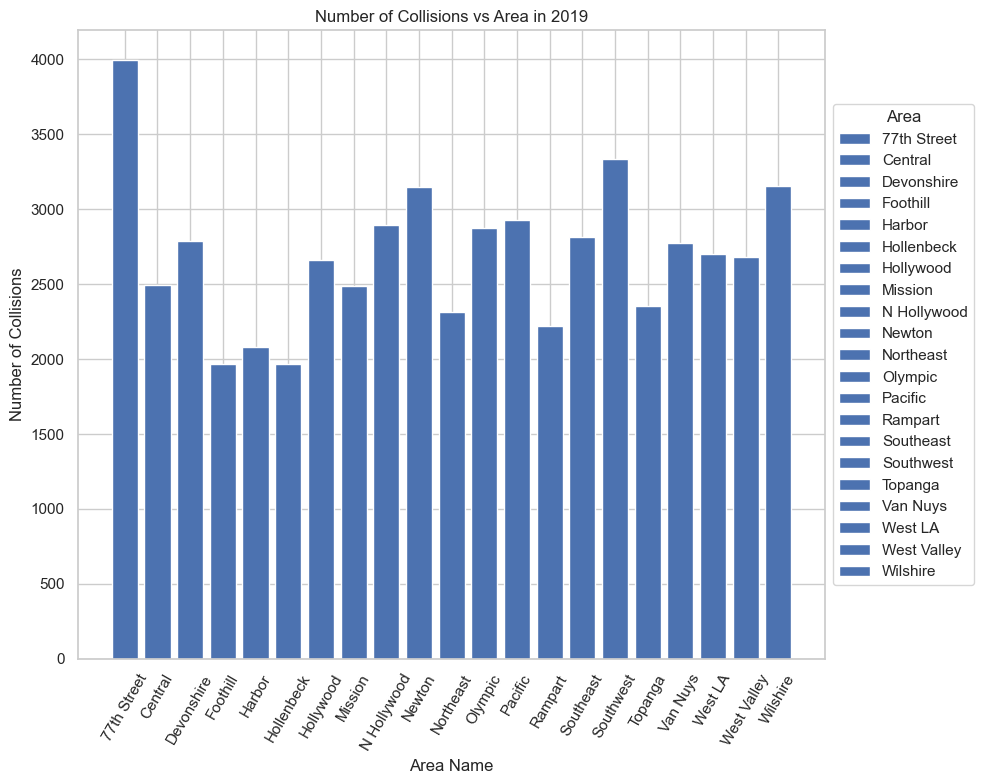

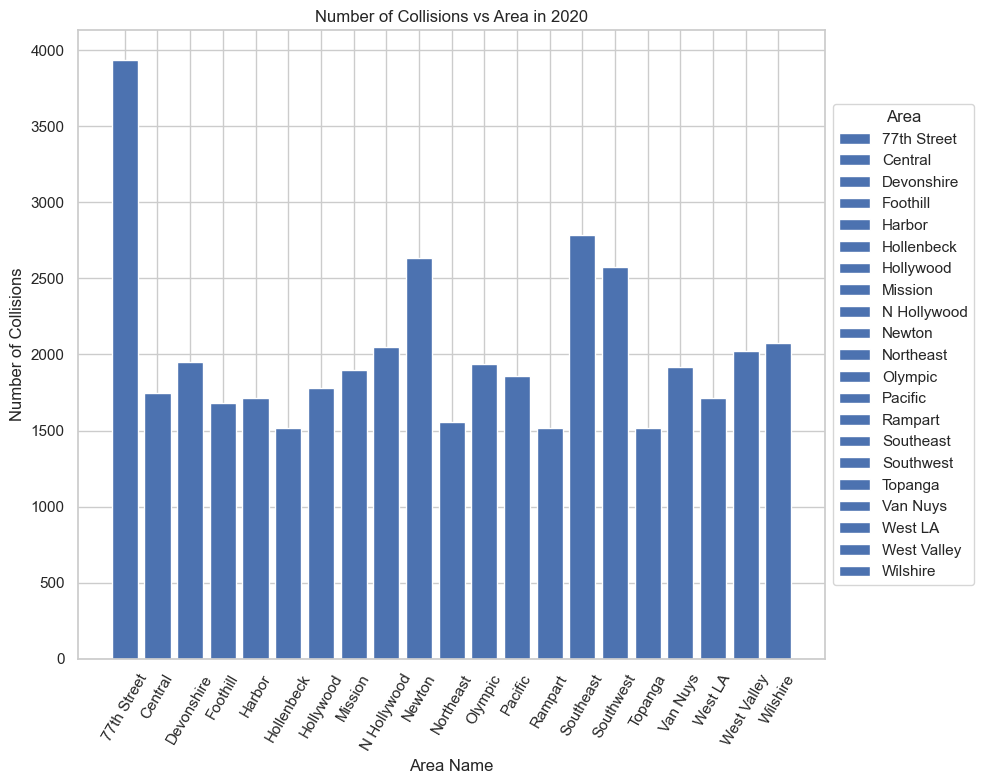

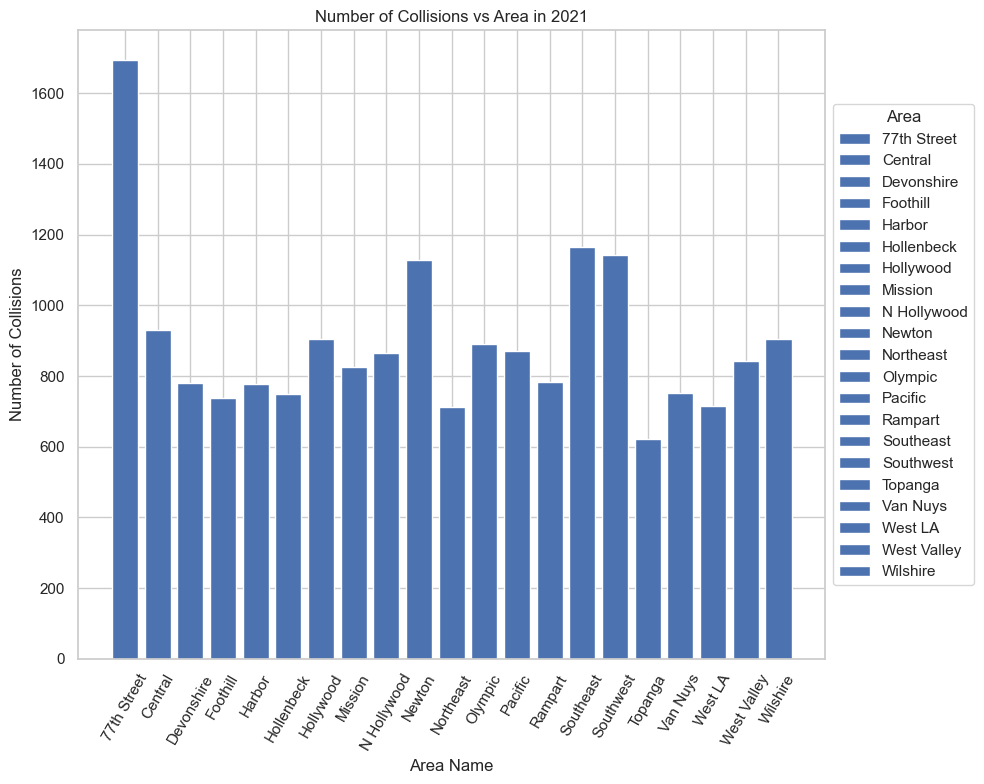

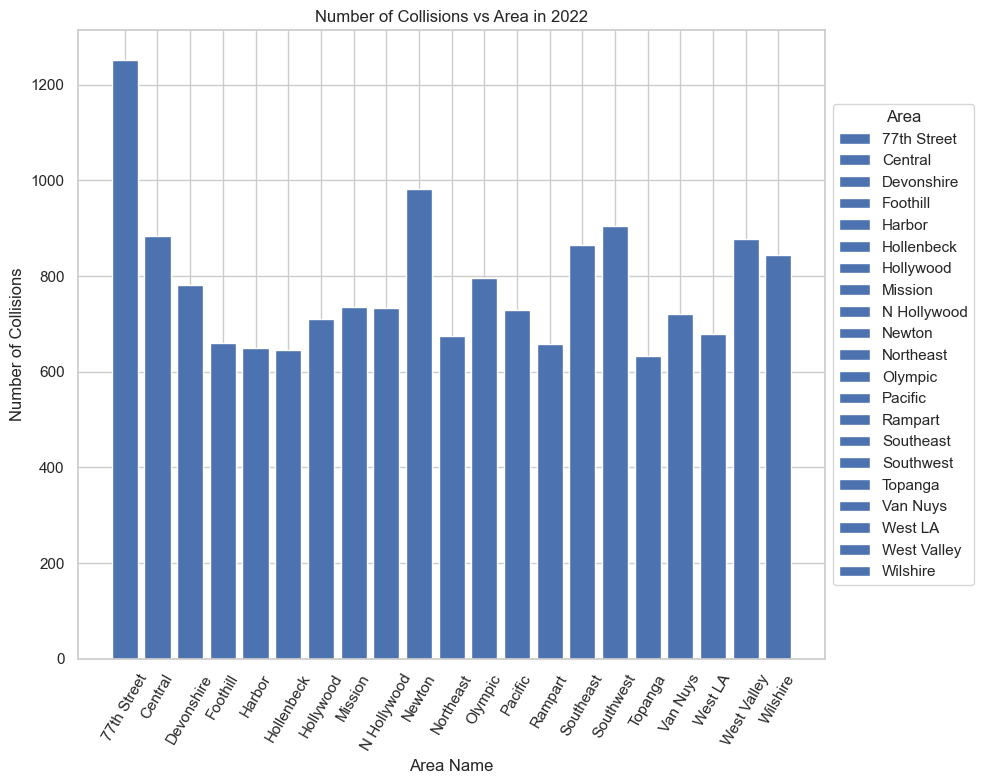

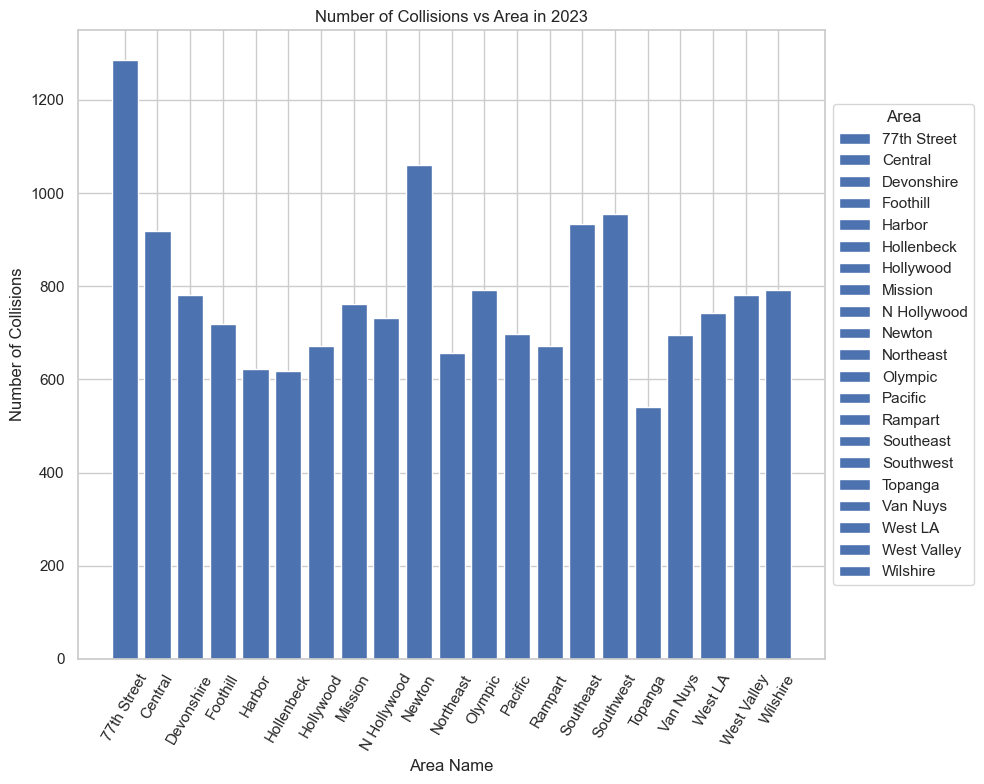

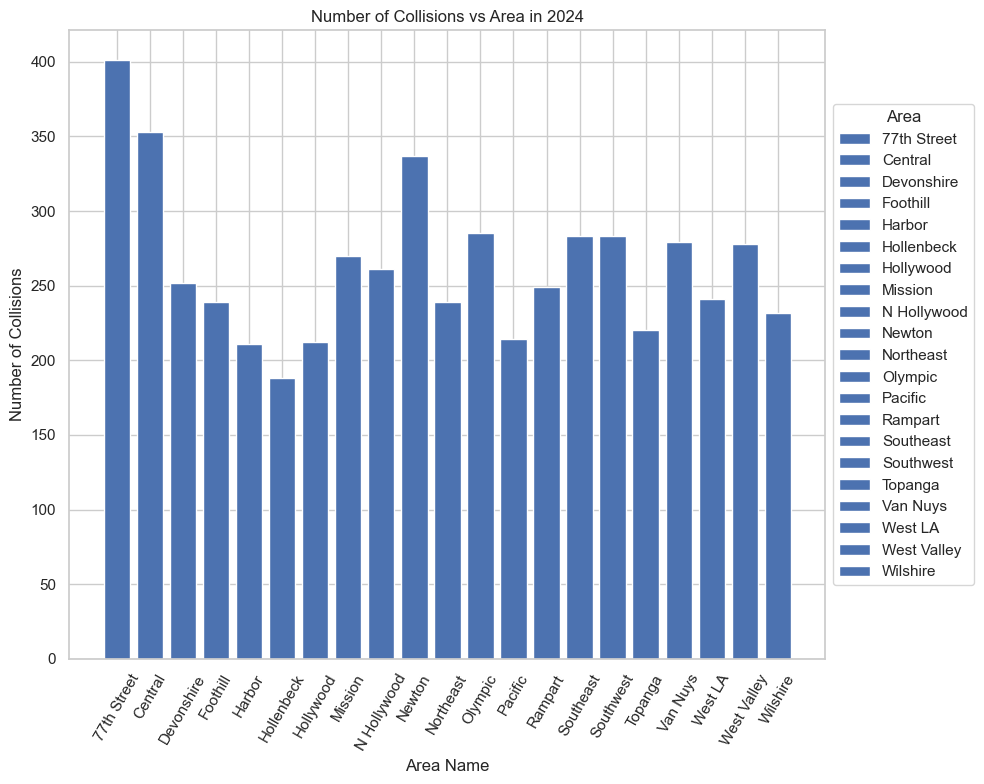

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt

# Read the CSV file
results_dataframe = pd.read_csv('D:/1 Data Science/Traffic_Collision_Data_from_2010_to_Present.csv')

# Convert 'Date Occurred' to datetime
results_dataframe['Date Occurred'] = pd.to_datetime(results_dataframe['Date Occurred'], format='%m/%d/%Y')

# Extract 'Year' and 'Month' from 'Date Occurred'
results_dataframe['Year'] = results_dataframe['Date Occurred'].dt.year
results_dataframe['Month'] = results_dataframe['Date Occurred'].dt.month

# Group by 'Date Occurred' and 'Area Name' and count occurrences
crime_counts_by_date_area = results_dataframe.groupby(['Date Occurred', 'Area Name']).size().unstack(fill_value=0)

# Plot stacked area plot
plt.figure(figsize=(12, 8))
crime_counts_by_date_area.plot(kind='area', figsize=(12, 8))
plt.title('Stacked Area Plot of Collisions by Area Over Time')
plt.xlabel('Date Occurred')
plt.ylabel('Number of Collisions')
plt.legend(title='Area Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Group by 'Year', 'Month', and 'Area Name' and count occurrences
crime_counts_by_year_month_area = results_dataframe.groupby(['Year', 'Month', 'Area Name']).size().unstack(fill_value=0)

# Plot heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(crime_counts_by_year_month_area, cmap='Blues', cbar=True)
plt.title('Heatmap of Collisions by Area and Month')
plt.xlabel('Area Name')
plt.ylabel('Month')
plt.tight_layout()
plt.show()

# Group by 'Area Name' and 'Year' to count the number of collisions per year per area
area_year_counts = results_dataframe.groupby(['Area Name', 'Year']).size().reset_index(name='Number of Collisions')

# Ensure the 'Number of Collisions' column is integer type
area_year_counts['Number of Collisions'] = area_year_counts['Number of Collisions'].astype(int)

# Stacked Bar Plot for Yearly Data
plt.figure(figsize=(14, 10))
pivot_table = area_year_counts.pivot_table(index="Year", columns="Area Name", values="Number of Collisions", fill_value=0)
pivot_table.plot(kind='bar', stacked=True, colormap='viridis', figsize=(14, 10))
plt.title('Stacked Bar Plot of Collisions by Area and Year')
plt.xlabel('Year')
plt.ylabel('Number of Collisions')
plt.legend(title='Area Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Box Plot for Yearly Data
plt.figure(figsize=(14, 10))
sns.boxplot(x="Year", y="Number of Collisions", data=area_year_counts)
plt.title('Box Plot of Collisions by Year')
plt.xlabel('Year')
plt.ylabel('Number of Collisions')
plt.show()

# Faceted Line Plots
g = sns.FacetGrid(area_year_counts, col="Area Name", col_wrap=4, height=4)
g.map(sns.lineplot, "Year", "Number of Collisions")
g.add_legend()
g.set_axis_labels("Year", "Number of Collisions")
g.fig.suptitle('Yearly Trends of Collisions by Area', y=1.02)
plt.show()

# Pie Chart of Total Collisions by Area
total_collisions_by_area = results_dataframe['Area Name'].value_counts()
plt.figure(figsize=(12, 12))
total_collisions_by_area.plot.pie(autopct='%1.1f%%', startangle=140, cmap='viridis')
plt.title('Proportion of Total Collisions by Area')
plt.ylabel('')
plt.show()

# Total Number of Collisions by Area (Bar Plot)
total_crime_counts = results_dataframe['Area Name'].value_counts().reset_index()
total_crime_counts.columns = ['Area Name', 'Total Collisions']
total_crime_counts = total_crime_counts.sort_values(by='Total Collisions', ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x="Total Collisions", y="Area Name", data=total_crime_counts, hue="Area Name", palette='viridis', legend=False)
plt.title('Total Number of Collisions by Area')
plt.xlabel('Number of Collisions')
plt.ylabel('Area Name')
plt.show()

# Top 5 Areas with Most Collisions Over Time
top_areas = area_year_counts.groupby('Area Name')['Number of Collisions'].sum().nlargest(5).index
top_area_data = area_year_counts[area_year_counts['Area Name'].isin(top_areas)]
plt.figure(figsize=(14, 10))
sns.lineplot(data=top_area_data, x='Year', y='Number of Collisions', hue='Area Name', marker='o')
plt.title('Trends of Number of Collisions for Top 5 Areas Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Collisions')
plt.legend(title='Area Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Set the style for seaborn
sns.set(style="whitegrid")
# Plot the trends over time for each area
plt.figure(figsize=(14, 10))
sns.lineplot(data=area_year_counts, x='Year', y='Number of Collisions', hue='Area Name', marker='o')

plt.title('Trends of Number of Collisions by Area Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Collisions')
plt.legend(title='Area Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Interactive Bar Chart with Altair
area_counts = results_dataframe['Area Name'].value_counts().reset_index()
area_counts.columns = ['Area Name', 'Number of Collisions']
bar_chart = alt.Chart(area_counts).mark_bar().encode(
    x=alt.X('Area Name', sort='-y'),
    y='Number of Collisions',
    tooltip=['Area Name', 'Number of Collisions']
).properties(
    title='Total Number of Collisions by Area'
).interactive()
bar_chart.show()

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt

# Read the CSV file
results_dataframe = pd.read_csv('D:/1 Data Science/Traffic_Collision_Data_from_2010_to_Present.csv')

# Convert 'Date Occurred' to datetime
results_dataframe['Date Occurred'] = pd.to_datetime(results_dataframe['Date Occurred'], format='%m/%d/%Y', errors='coerce')

# Extract 'Year' from 'Date Occurred'
results_dataframe['Year'] = results_dataframe['Date Occurred'].dt.year

# Group by 'Year' and count occurrences
crime_counts_by_year = results_dataframe['Year'].value_counts().sort_index()

# Create pie chart for collisions by year
plt.figure(figsize=(8, 6))
plt.pie(crime_counts_by_year, labels=crime_counts_by_year.index, autopct='%1.1f%%')
plt.title('Number of Collisions by Year')
plt.axis('equal')
plt.legend(title='Year', loc='upper left')
plt.show()

# Group by 'Area Name' to count the total number of collisions
total_crime_counts_by_area = results_dataframe['Area Name'].value_counts()

# Plot the total number of collisions for each area
plt.figure(figsize=(12, 8))
total_crime_counts_by_area.plot(kind='bar')
plt.title('Total Number of Collisions by Area')
plt.xlabel('Area Name')
plt.ylabel('Number of Collisions')
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()


results_dataframe['Date Occurred'] = pd.to_datetime(results_dataframe['Date Occurred'], errors='coerce')

# Extract the year from the 'Date Occurred' column
results_dataframe['YEAR'] = results_dataframe['Date Occurred'].dt.year

# Group by YEAR and Area Name to count the number of crimes
crime_counts = results_dataframe.groupby(['YEAR', 'Area Name']).size().unstack(fill_value=0)

# Plot pie charts for each year
for year in crime_counts.index:
    fig, ax = plt.subplots(figsize=(10, 8))
    wedges, texts, autotexts = ax.pie(crime_counts.loc[year], labels=crime_counts.columns, autopct='%1.1f%%', startangle=140)
    
    ax.set_title(f'Number of Collisions by Area in {year}')
    
    # Adjust the legend to be further outside the pie chart
    ax.legend(wedges, crime_counts.columns, title='Area', loc='center left', bbox_to_anchor=(1.1, 0.5))
    
    # Adjust layout to prevent overlapping
    plt.tight_layout()
    
    plt.show()



# Convert the 'Date Occurred' column to datetime
results_dataframe['Date Occurred'] = pd.to_datetime(results_dataframe['Date Occurred'], errors='coerce')

# Extract the year from the 'Date Occurred' column
results_dataframe['YEAR'] = results_dataframe['Date Occurred'].dt.year

# Group by YEAR and Area Name to count the number of crimes
crime_counts = results_dataframe.groupby(['YEAR', 'Area Name']).size().unstack(fill_value=0)

# Plot bar charts for each year
for year in crime_counts.index:
    fig, ax = plt.subplots(figsize=(10, 8))
    bars = ax.bar(crime_counts.columns, crime_counts.loc[year])
    
    ax.set_title(f'Number of Collisions vs Area in {year}')
    ax.set_xlabel('Area Name')
    ax.set_ylabel('Number of Collisions')    
    # Rotate the x-axis labels to avoid overlap
    plt.xticks(rotation=60)    
    # Adjust the legend to be outside the bar graph
    ax.legend(bars, crime_counts.columns, title='Area', loc='center left', bbox_to_anchor=(1.0, 0.5))    
    # Adjust layout to prevent overlapping
    plt.tight_layout()    
    plt.show()


In [51]:
print("Through thorough analysis and visualization of traffic collision data in the Braodely area, this report provides valuable insights into the temporal and spatial patterns of collisions over the years. By leveraging diverse visualization techniques, stakeholders can formulate evidence-based strategies to enhance road safety and mitigate collision risks in Braodely.")


Through thorough analysis and visualization of traffic collision data in the Braodely area, this report provides valuable insights into the temporal and spatial patterns of collisions over the years. By leveraging diverse visualization techniques, stakeholders can formulate evidence-based strategies to enhance road safety and mitigate collision risks in Braodely.


In [52]:
print("\nThrough thorough analysis and visualization of traffic collision data in the Braodely area, this report provides valuable insights into the temporal and spatial patterns of collisions over the years.\n\nBy leveraging diverse visualization techniques, stakeholders can formulate evidence-based strategies to enhance road safety and mitigate collision risks in Braodely.\n")



Through thorough analysis and visualization of traffic collision data in the Braodely area, this report provides valuable insights into the temporal and spatial patterns of collisions over the years.

By leveraging diverse visualization techniques, stakeholders can formulate evidence-based strategies to enhance road safety and mitigate collision risks in Braodely.



In [54]:
print("\n\n\t\tThrough thorough analysis and visualization of traffic collision data in the Braodely area, this report provides valuable insights into the temporal and spatial patterns of collisions over the years.\n\n\t\tBy leveraging diverse visualization techniques, stakeholders can formulate evidence-based strategies to enhance road safety and mitigate collision risks in Braodely.\n\n")




		Through thorough analysis and visualization of traffic collision data in the Braodely area, this report provides valuable insights into the temporal and spatial patterns of collisions over the years.

		By leveraging diverse visualization techniques, stakeholders can formulate evidence-based strategies to enhance road safety and mitigate collision risks in Braodely.


